# **Analyzing social issues in Indian political speeches using Latent Dirichlet Allocation (LDA) pre and post covid-19 pandemic**

#Table content



*   Introduction
*   Data preprocessing
*   Bigrams and Trigrams identification
*   Vectorization
*   Coherence analisis
*   Latent Dirichlet Allocation running
*   Sources










#Introduction

This analysis looked at the India Union Budget speech of 2018 and 2021 given by Arun Jaitley and Nirmala Sitharaman respectively. [1, 2]
The model utilized was Latent Dirichlet Allocation (LDA), to find natural separations of topics in each speech to find differences before and after the apperance of COVID-19.

#Imports and paths


In [ ]:
import pandas as pd
!pip install --upgrade pandas==1.2
import numpy as np
from google.colab import files, drive
drive.mount ("/content/drive", force_remount=True) #mount your google drive

Requirement already up-to-date: pandas==1.2 in /usr/local/lib/python3.7/dist-packages (1.2.0)
Mounted at /content/drive


In [ ]:
ls "drive/MyDrive/India budget speech"

'2018 speech.txt'   2021speech.txt   India_topics.ipynb


In [ ]:
budget_speech = "drive/MyDrive/India budget speech"
eight = "drive/MyDrive/India budget speech/2018 speech.txt"
one = "drive/MyDrive/India budget speech/2021speech.txt"

In [ ]:
eight_csv = pd.read_csv(eight, delimiter="/t", header=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
eight_csv

,0
0,"Madam Speaker,"
1,1. I rise to present the Budget for 2018-19.
2,"2. Madam, four years ago, we pledged to the pe..."
3,3. The journey of economic reforms during the ...
4,4. Indian economy has performed very well sinc...
...,...
203,162.I propose to abolish the Education Cess an...
204,163.I also propose to make certain changes to ...
205,"164.With the roll out of GST, I propose to cha..."
206,"165.Madam, while making the proposals in this ..."


In [ ]:
one_csv = pd.read_csv(one, delimiter="/t", header=None, encoding="cp1252")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
one_csv

,0
0,"Hon’ble Speaker,"
1,I present the Budget for the year 2021-2022.
2,Introduction
3,"1. Honourable Speaker, the preparation of this..."
4,"2. When I presented the Budget 2020-21, we cou..."
...,...
354,* Students have so far been evaluated on uni-d...
355,"* To enable increased access of resources, onl..."
356,"* During the year, despite the COVID-19 pandem..."
357,* For the past few years our Prime Minister ha...


#Data preprocessing

In [ ]:
import warnings
import spacy #splits parts of speech
import nltk #removes non imporant words for big picture
import re #regular expressions -  search and graph patterns
import string #functions 
import pickle #compress files
import gensim #package that contains machine laerning model
from gensim import corpora 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from gensim.models.ldamodel import LdaModel #model
!pip install q pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook() #import statements

# NLTK Stop words - removes non imporant words for big picture
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Plotting - tags words (nouns, verbs)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [ ]:
nlp = spacy.load('en')
STOPWORDS_DICT = {lang: set(nltk.corpus.stopwords.words(lang)) for lang in nltk.corpus.stopwords.fileids()}

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:
STOPWORDS_DICT

{'arabic': {'آه',
  'آها',
  'آي',
  'أف',
  'أقل',
  'أكثر',
  'ألا',
  'أم',
  'أما',
  'أن',
  'أنا',
  'أنت',
  'أنتم',
  'أنتما',
  'أنتن',
  'أنى',
  'أو',
  'أولئك',
  'أولاء',
  'أوه',
  'أي',
  'أين',
  'أينما',
  'أيها',
  'إذ',
  'إذا',
  'إذما',
  'إذن',
  'إلا',
  'إلى',
  'إليك',
  'إليكم',
  'إليكما',
  'إليكن',
  'إما',
  'إن',
  'إنا',
  'إنما',
  'إنه',
  'إي',
  'إيه',
  'التي',
  'الذي',
  'الذين',
  'اللائي',
  'اللاتي',
  'اللتان',
  'اللتيا',
  'اللتين',
  'اللذان',
  'اللذين',
  'اللواتي',
  'بخ',
  'بس',
  'بعد',
  'بعض',
  'بك',
  'بكم',
  'بكما',
  'بكن',
  'بل',
  'بلى',
  'بما',
  'بماذا',
  'بمن',
  'بنا',
  'به',
  'بها',
  'بهم',
  'بهما',
  'بهن',
  'بي',
  'بيد',
  'بين',
  'تلك',
  'تلكم',
  'تلكما',
  'ته',
  'تي',
  'تين',
  'تينك',
  'ثم',
  'ثمة',
  'حاشا',
  'حبذا',
  'حتى',
  'حيث',
  'حيثما',
  'حين',
  'خلا',
  'دون',
  'ذا',
  'ذات',
  'ذاك',
  'ذان',
  'ذانك',
  'ذلك',
  'ذلكم',
  'ذلكما',
  'ذلكن',
  'ذه',
  'ذو',
  'ذوا',
  'ذواتا',
  'ذوا

Before machine learning occurs the text data must be standardized. This process includes removing special characters, making text lower case, lemmatizing words (matching words to their root word),removing punctuation, double spaces and, numbers.


In [ ]:
def clean_all (df,col_name):    
    """
    Combines all functions used to clean and lemmatize the comments.
    :param df: data frame with comments
    :param col_name: column name in data frame containing comments
    :return: data frame with comments column lemmatized
    """

    # encode for only ascii characters
    df[col_name] = df[col_name].map(ascii_rm)
    
    # lowercase texts
    df[col_name] = df[col_name].map(lambda x: x.lower())


    # lemmatize words
    df[col_name] = df[col_name].astype(str).map(lemma) #to root word

    # remove punctuation
    df[col_name] = df[col_name].map(punc_n)


    df = df[df[col_name] != ""] #delet blank rows
    
    return df

In [ ]:
def ascii_rm(comment): #remove special characters (basic letters)
    """
    Parses comments and keep only ascii characters
    :param comment: a comment
    :return: comment with only ascii characters
    """
    comment = comment.encode('ascii', errors = 'ignore')
    return comment

def punc_n(comment): #rid of numbers, spaces, punctuation
    """
    Removes punctuations from comments.
    :param comment: a comment
    :return: comment without punctuations
    """
    regex = re.compile('[' + re.escape('!"#%&\'()*+,-./:;<=>?@[\\]^_`{|}~')+'0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", comment)
    nopunct_words = nopunct.split(' ')
    filter_words = [word.strip() for word in nopunct_words if word != '']
    words = ' '.join(filter_words)
    return words

def lemma(comment): #root word regression
    """
    Lemmatize comments using spacy lemmatizer.
    :param comment: a comment
    :return: lemmatized comment
    """
    lemmatized = nlp(comment)
    lemmatized_final = ' '.join([word.lemma_ for word in lemmatized if word.lemma_ != '\'s'])
    return lemmatized_final


In [ ]:
eight_csv[0]

0                                         Madam Speaker,
1           1. I rise to present the Budget for 2018-19.
2      2. Madam, four years ago, we pledged to the pe...
3      3. The journey of economic reforms during the ...
4      4. Indian economy has performed very well sinc...
                             ...                        
203    162.I propose to abolish the Education Cess an...
204    163.I also propose to make certain changes to ...
205    164.With the roll out of GST, I propose to cha...
206    165.Madam, while making the proposals in this ...
207    166.With these words, Madam Speaker, I commend...
Name: 0, Length: 208, dtype: object

In [ ]:
eight_clean = clean_all(eight_csv, 0)
one_clean = clean_all(one_csv, 0)

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [ ]:
eight_clean

,0
0,b madam speaker
1,b i rise to present the budget for
2,b madam four year ago PRON pledge to the peopl...
3,b the journey of economic reform during the pa...
4,b indian economy have perform very well since ...
...,...
203,b i propose to abolish the education cess and ...
204,b i also propose to make certain change to the...
205,b with the roll out of gst i propose to change...
206,b madam while make the proposal in this year b...


In [ ]:
one_clean

,0
0,b honble speaker
1,b i present the budget for the year
2,b introduction
3,b honourable speaker the preparation of this b...
4,b when i present the budget PRON could not hav...
...,...
354,b student have so far be evaluate on uni dimen...
355,b to enable increased access of resource onlin...
356,b during the year despite the covid pandemic P...
357,b for the past few year PRON prime minister ha...


Stop words identified were removed from corpus, including names and ambiguous words.

In [ ]:
stop_word_list = ["issue","problem","level", "face","unsweetened", "almond", "milk","belly", "button", "fnut", "j", "c","peanut", "butter", "nlm","gt", "utm","r", "comment","src", "hashtag", "click", "q","k","ds", "dna", "survey","rand","pjpg", "format","redd","snrnp", "pac", "z","jpg", "width", "gi", "x", "www","aggragate", "xftmya", "ybso", "url", "sitebuttons", "unc", "chapel","tsp", "kratom", "szhfjzs", "cy","meq", "szhfjzs", "loledit", "chickene", "b","uclah", "sv", "vpvlqaqyi", "tmg","iwar", "fbclid", "npw","lead","maybe","enb", "mean","fyhtykwamn", "wvxkt", "blood","right", "leave", "company","create", "low", "lol", "wear","new","lunatic","normal", "active","follow","opinion","figure,""limit", "make","weeks", "construction","see","woman","multiple","cinema","lavend","field","dark","loved","fondly","cope","exercise","catch","bit","specifically","look","date","system","share","matter","regularly",
                   "throw","s","ski","ahead","fully","affect","addition","result","tolerance", "whenever","favorite","acronym","water","reasonable","atm", "grow", "breathe", "focus", "study", "produce", "reminder","diarrhea", "leg", "end","super","loss","appear", "improve", "spoken", "tier", "worth", "mind", "opportunity", "adhd", "physically", "ensure", "article", "link", "course", "reach", "wrong", "joint", "write", "expect", "consider", "ever", "easy","similar",
                   "email","nee","cool","buy","receive","small","build","manage","damage","bio","many","doc","seriously","omg","ft","rn","head","sit","helpful","reduce","come","person","show","luck","video","collect","common","team","point_also","will","med","back","learn","add","hour", "usually", "keep","also","serious", "ask", "isssue","rule", "stop","manually","set", "factor","approach","oppose", "attempt", "curious", "reality", "noise", "due", "often",
                   "arm","ucrh_mal","rn","stick","let","barely","impossible","act","kind","surround","fighter","usual", "understandably", "shortly", "prior", "immediate", "order", "side", "redcap", "period","days","total","able", "understanding", "understand", "paper", "crohn","wreaks", "sound", "misread", "visit", "strongly", "seek", "attach", "await", "change", "living", "crap", "area", "weekly","late","top","respect","effect","nice","hot","have", "belief", 
                   "rub", "hence", "frequently","forget", "free", "mmr", "map", "hand", "screw", "never", "https", "constantly","aspect","really","may","lot","full","enough","hard","project","other","otherwise","distract","enjoy","poope","interested","function","mess","get","son","however","first","anyway","recommend","functional","sweet","way","go","rectal","offer","incorporate","speak","self","even","type","mile","forward","strong","perceive","broad",
                   "whole","early","cam","much","large","else","finally","last","appreciate","read","day", "mydn","roll","part", "check", "meal","do","real","discuss","absence","list","yesterday", "room","later","none","begin","describe","slight","break","week", "up","move","lupus","chrohn","ure","already","term","twvwipavjd","practice","hear","hearing","treat","rather","perspective","feel", "hold", "fellow", "current", "thought","well","think", "care", "high", "little", "know", 
                   "time", "start", "month", "wonder", "shit", "tell", "need", "long", "things", "thing", "hours", "try", "thank", "obviously", "year", "talk", "anti", "daily", "allow", "want", "tomorrow", "months", "july", "recently", "far","co","devin_currently", "april", "summer", "put",  "march", "associate", "sure", "haven", "friday", "great", "dont", "post", "easier", "pretty", "higher", "good", "years", "currently", "precision","eat","tmrw", 
                   "stephani", "happen", "second", "yawn" "fully", "soon", "sorry", "tuesday", "till", "smallest", "shouldn", "gatorade", "name", "completely", "today", "couldn","wasn", "lose", "longer","picture", "explain","twice", "yet","seem","seem","one","highly", "promise","annoy", "wing","advance","personally","tear","turn","potential","note","regard","pass","send", "possible","definitely","anymore","reason","guy","guess", "sort","reply","next", "actually", 
                   "suppose", "require","absolutely", "still","topic","highlight","probably","january","beautiful","book","bring", "life","several", "better","decade","michigan", "pred", "deal", "best", "say","could","aim","fill","stretch","tia","hip","form","instead","especially","would","include","old","likely","situation","use","work","find","positive", "butterfly", "specific", "love","huge", "adult","com","accept","skill","cause","https_www","live","taper",
                   "fail","counter","post_new","sign", "figure", "wife","double", "june", "people", "place", "drink", "food", "afternoon", "plan", "stuff", "recall", "past", "maintain", "cover", "page", "dairy", "status", "hair", "point", "fine", "sport", "experience", "watch", "wait", "weird", "fall", "plus", "night", "basically", "meat", "spot", "different", "walk", "away", "like", "tolerate", "itchy", "fuck", "half", "random", "nearly", "everyday", "play", "salt", "prep",
                   "generally", "yellow", "green", "board", "hop", "couple", "morning", "line", "upper", "yawn","warm", "chat", "felt", "accompany", "thoughts", "february", "monday", "extremely", "wake", "somewhat", "aren", "chicken", "sunday", "lower", "game", "incredibly", "temporarily", "notice", "lay", "finger", "sell", "tract", "minutes", "literally", "print", "shut", "cross", "feet"] + ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'kg', 'km', 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'make', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'quite', 'rather', 'rather', 're', 'really', 'regarding', 'same', 'say', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', 'ten', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thick', 'thin', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'unless', 'until', 'up', 'upon', 'us', 'used', 'using', 'various', 'very', 'very', 'via', 'was', 'we', 'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves']
english_names = ['aaren', 'aarika', 'abagael', 'abagail', 'abbe', 'abbey', 'abbi', 'abbie', 'abby', 'abbye', 'abigael', 'abigail', 'abigale', 'abra', 'ada', 'adah', 'adaline', 'adan', 'adara', 'adda', 'addi', 'addia', 'addie', 'addy', 'adel', 'adela', 'adelaida', 'adelaide', 'adele', 'adelheid', 'adelice', 'adelina', 'adelind', 'adeline', 'adella', 'adelle', 'adena', 'adey', 'adi', 'adiana', 'adina', 'adora', 'adore', 'adoree', 'adorne', 'adrea', 'adria', 'adriaens', 'adrian', 'adriana', 'adriane', 'adrianna', 'adrianne', 'adriena', 'adrienne', 'aeriel', 'aeriela', 'aeriell', 'afton', 'ag', 'agace', 'agata', 'agatha', 'agathe', 'aggi', 'aggie', 'aggy', 'agna', 'agnella', 'agnes', 'agnese', 'agnesse', 'agneta', 'agnola', 'agretha', 'aida', 'aidan', 'aigneis', 'aila', 'aile', 'ailee', 'aileen', 'ailene', 'ailey', 'aili', 'ailina', 'ailis', 'ailsun', 'ailyn', 'aime', 'aimee', 'aimil', 'aindrea', 'ainslee', 'ainsley', 'ainslie', 'ajay', 'alaine', 'alameda', 'alana', 'alanah', 'alane', 'alanna', 'alayne', 'alberta', 'albertina', 'albertine', 'albina', 'alecia', 'aleda', 'aleece', 'aleen', 'alejandra', 'alejandrina', 'alena', 'alene', 'alessandra', 'aleta', 'alethea', 'alex', 'alexa', 'alexandra', 'alexandrina', 'alexi', 'alexia', 'alexina', 'alexine', 'alexis', 'alfi', 'alfie', 'alfreda', 'alfy', 'ali', 'alia', 'alica', 'alice', 'alicea', 'alicia', 'alida', 'alidia', 'alie', 'alika', 'alikee', 'alina', 'aline', 'alis', 'alisa', 'alisha', 'alison', 'alissa', 'alisun', 'alix', 'aliza', 'alla', 'alleen', 'allegra', 'allene', 'alli', 'allianora', 'allie', 'allina', 'allis', 'allison', 'allissa', 'allix', 'allsun', 'allx', 'ally', 'allyce', 'allyn', 'allys', 'allyson', 'alma', 'almeda', 'almeria', 'almeta', 'almira', 'almire', 'aloise', 'aloisia', 'aloysia', 'alta', 'althea', 'alvera', 'alverta', 'alvina', 'alvinia', 'alvira', 'alyce', 'alyda', 'alys', 'alysa', 'alyse', 'alysia', 'alyson', 'alyss', 'alyssa', 'amabel', 'amabelle', 'amalea', 'amalee', 'amaleta', 'amalia', 'amalie', 'amalita', 'amalle', 'amanda', 'amandi', 'amandie', 'amandy', 'amara', 'amargo', 'amata', 'amber', 'amberly', 'ambur', 'ame', 'amelia', 'amelie', 'amelina', 'ameline', 'amelita', 'ami', 'amie', 'amii', 'amil', 'amitie', 'amity', 'ammamaria', 'amy', 'amye', 'ana', 'anabal', 'anabel', 'anabella', 'anabelle', 'analiese', 'analise', 'anallese', 'anallise', 'anastasia', 'anastasie', 'anastassia', 'anatola', 'andee', 'andeee', 'anderea', 'andi', 'andie', 'andra', 'andrea', 'andreana', 'andree', 'andrei', 'andria', 'andriana', 'andriette', 'andromache', 'andy', 'anestassia', 'anet', 'anett', 'anetta', 'anette', 'ange', 'angel', 'angela', 'angele', 'angelia', 'angelica', 'angelika', 'angelina', 'angeline', 'angelique', 'angelita', 'angelle', 'angie', 'angil', 'angy', 'ania', 'anica', 'anissa', 'anita', 'anitra', 'anjanette', 'anjela', 'ann', 'ann-marie', 'anna', 'anna-diana', 'anna-diane', 'anna-maria', 'annabal', 'annabel', 'annabela', 'annabell', 'annabella', 'annabelle', 'annadiana', 'annadiane', 'annalee', 'annaliese', 'annalise', 'annamaria', 'annamarie', 'anne', 'anne-corinne', 'anne-marie', 'annecorinne', 'anneliese', 'annelise', 'annemarie', 'annetta', 'annette', 'anni', 'annice', 'annie', 'annis', 'annissa', 'annmaria', 'annmarie', 'annnora', 'annora', 'anny', 'anselma', 'ansley', 'anstice', 'anthe', 'anthea', 'anthia', 'anthiathia', 'antoinette', 'antonella', 'antonetta', 'antonia', 'antonie', 'antonietta', 'antonina', 'anya', 'appolonia', 'april', 'aprilette', 'ara', 'arabel', 'arabela', 'arabele', 'arabella', 'arabelle', 'arda', 'ardath', 'ardeen', 'ardelia', 'ardelis', 'ardella', 'ardelle', 'arden', 'ardene', 'ardenia', 'ardine', 'ardis', 'ardisj', 'ardith', 'ardra', 'ardyce', 'ardys', 'ardyth', 'aretha', 'ariadne', 'ariana', 'aridatha', 'ariel', 'ariela', 'ariella', 'arielle', 'arlana', 'arlee', 'arleen', 'arlen', 'arlena', 'arlene', 'arleta', 'arlette', 'arleyne', 'arlie', 'arliene', 'arlina', 'arlinda', 'arline', 'arluene', 'arly', 'arlyn', 'arlyne', 'aryn', 'ashely', 'ashia', 'ashien', 'ashil', 'ashla', 'ashlan', 'ashlee', 'ashleigh', 'ashlen', 'ashley', 'ashli', 'ashlie', 'ashly', 'asia', 'astra', 'astrid', 'astrix', 'atalanta', 'athena', 'athene', 'atlanta', 'atlante', 'auberta', 'aubine', 'aubree', 'aubrette', 'aubrey', 'aubrie', 'aubry', 'audi', 'audie', 'audra', 'audre', 'audrey', 'audrie', 'audry', 'audrye', 'audy', 'augusta', 'auguste', 'augustina', 'augustine', 'aundrea', 'aura', 'aurea', 'aurel', 'aurelea', 'aurelia', 'aurelie', 'auria', 'aurie', 'aurilia', 'aurlie', 'auroora', 'aurora', 'aurore', 'austin', 'austina', 'austine', 'ava', 'aveline', 'averil', 'averyl', 'avie', 'avis', 'aviva', 'avivah', 'avril', 'avrit', 'ayn', 'bab', 'babara', 'babb', 'babbette', 'babbie', 'babette', 'babita', 'babs', 'bambi', 'bambie', 'bamby', 'barb', 'barbabra', 'barbara', 'barbara-anne', 'barbaraanne', 'barbe', 'barbee', 'barbette', 'barbey', 'barbi', 'barbie', 'barbra', 'barby', 'bari', 'barrie', 'barry', 'basia', 'bathsheba', 'batsheva', 'bea', 'beatrice', 'beatrisa', 'beatrix', 'beatriz', 'bebe', 'becca', 'becka', 'becki', 'beckie', 'becky', 'bee', 'beilul', 'beitris', 'bekki', 'bel', 'belia', 'belicia', 'belinda', 'belita', 'bell', 'bella', 'bellanca', 'belle', 'bellina', 'belva', 'belvia', 'bendite', 'benedetta', 'benedicta', 'benedikta', 'benetta', 'benita', 'benni', 'bennie', 'benny', 'benoite', 'berenice', 'beret', 'berget', 'berna', 'bernadene', 'bernadette', 'bernadina', 'bernadine', 'bernardina', 'bernardine', 'bernelle', 'bernete', 'bernetta', 'bernette', 'berni', 'bernice', 'bernie', 'bernita', 'berny', 'berri', 'berrie', 'berry', 'bert', 'berta', 'berte', 'bertha', 'berthe', 'berti', 'bertie', 'bertina', 'bertine', 'berty', 'beryl', 'beryle', 'bess', 'bessie', 'bessy', 'beth', 'bethanne', 'bethany', 'bethena', 'bethina', 'betsey', 'betsy', 'betta', 'bette', 'bette-ann', 'betteann', 'betteanne', 'betti', 'bettina', 'bettine', 'betty', 'bettye', 'beulah', 'bev', 'beverie', 'beverlee', 'beverley', 'beverlie', 'beverly', 'bevvy', 'bianca', 'bianka', 'bibbie', 'bibby', 'bibbye', 'bibi', 'biddie', 'biddy', 'bidget', 'bili', 'bill', 'billi', 'billie', 'billy', 'billye', 'binni', 'binnie', 'binny', 'bird', 'birdie', 'birgit', 'birgitta', 'blair', 'blaire', 'blake', 'blakelee', 'blakeley', 'blanca', 'blanch', 'blancha', 'blanche', 'blinni', 'blinnie', 'blinny', 'bliss', 'blisse', 'blithe', 'blondell', 'blondelle', 'blondie', 'blondy', 'blythe', 'bobbe', 'bobbee', 'bobbette', 'bobbi', 'bobbie', 'bobby', 'bobbye', 'bobette', 'bobina', 'bobine', 'bobinette', 'bonita', 'bonnee','bonni', 'bonnibelle', 'bonnie', 'bonny', 'brana', 'brandais', 'brande', 'brandea', 'brandi', 'brandice', 'brandie', 'brandise', 'brandy', 'breanne', 'brear', 'bree', 'breena', 'bren', 'brena', 'brenda', 'brenn', 'brenna', 'brett', 'bria', 'briana', 'brianna', 'brianne', 'bride', 'bridget', 'bridgette', 'bridie', 'brier', 'brietta', 'brigid', 'brigida', 'brigit', 'brigitta', 'brigitte', 'brina', 'briney', 'brinn', 'brinna', 'briny', 'brit', 'brita', 'britney', 'britni', 'britt', 'britta', 'brittan', 'brittaney', 'brittani', 'brittany', 'britte', 'britteny', 'brittne', 'brittney', 'brittni', 'brook', 'brooke', 'brooks', 'brunhilda', 'brunhilde', 'bryana', 'bryn', 'bryna', 'brynn', 'brynna', 'brynne', 'buffy', 'bunni', 'bunnie', 'bunny', 'cacilia', 'cacilie', 'cahra', 'cairistiona', 'caitlin', 'caitrin', 'cal', 'calida', 'calla', 'calley', 'calli', 'callida', 'callie', 'cally', 'calypso', 'cam', 'camala', 'camel', 'camella', 'camellia', 'cami', 'camila', 'camile', 'camilla', 'camille', 'cammi', 'cammie', 'cammy', 'candace', 'candi', 'candice', 'candida', 'candide', 'candie', 'candis', 'candra', 'candy', 'caprice', 'cara', 'caralie', 'caren', 'carena', 'caresa', 'caressa', 'caresse', 'carey', 'cari', 'caria', 'carie', 'caril', 'carilyn', 'carin', 'carina', 'carine', 'cariotta', 'carissa', 'carita', 'caritta', 'carla', 'carlee', 'carleen', 'carlen', 'carlene', 'carley', 'carlie', 'carlin', 'carlina', 'carline', 'carlita', 'carlota', 'carlotta', 'carly', 'carlye', 'carlyn', 'carlynn', 'carlynne', 'carma', 'carmel', 'carmela', 'carmelia', 'carmelina', 'carmelita', 'carmella', 'carmelle', 'carmen', 'carmencita', 'carmina', 'carmine', 'carmita', 'carmon', 'caro', 'carol', 'carol-jean', 'carola', 'carolan', 'carolann', 'carole', 'carolee', 'carolin', 'carolina', 'caroline', 'caroljean', 'carolyn', 'carolyne', 'carolynn', 'caron', 'carree', 'carri', 'carrie', 'carrissa', 'carroll', 'carry', 'cary', 'caryl', 'caryn', 'casandra', 'casey', 'casi', 'casie', 'cass', 'cassandra', 'cassandre', 'cassandry', 'cassaundra', 'cassey', 'cassi', 'cassie', 'cassondra', 'cassy', 'catarina', 'cate', 'caterina', 'catha', 'catharina', 'catharine', 'cathe', 'cathee', 'catherin', 'catherina', 'catherine', 'cathi', 'cathie', 'cathleen', 'cathlene', 'cathrin', 'cathrine', 'cathryn', 'cathy', 'cathyleen', 'cati', 'catie', 'catina', 'catlaina', 'catlee', 'catlin', 'catrina', 'catriona', 'caty', 'caye', 'cayla', 'cecelia', 'cecil', 'cecile', 'ceciley', 'cecilia', 'cecilla', 'cecily', 'ceil', 'cele', 'celene', 'celesta', 'celeste', 'celestia', 'celestina', 'celestine', 'celestyn', 'celestyna', 'celia', 'celie', 'celina', 'celinda', 'celine', 'celinka', 'celisse', 'celka', 'celle', 'cesya', 'chad', 'chanda', 'chandal', 'chandra', 'channa', 'chantal', 'chantalle', 'charil', 'charin', 'charis', 'charissa', 'charisse', 'charita', 'charity', 'charla', 'charlean', 'charleen', 'charlena', 'charlene', 'charline', 'charlot', 'charlotta', 'charlotte', 'charmain', 'charmaine', 'charmane', 'charmian', 'charmine', 'charmion', 'charo', 'charyl', 'chastity', 'chelsae', 'chelsea', 'chelsey', 'chelsie', 'chelsy', 'cher', 'chere', 'cherey', 'cheri', 'cherianne', 'cherice', 'cherida', 'cherie', 'cherilyn', 'cherilynn', 'cherin', 'cherise', 'cherish', 'cherlyn', 'cherri', 'cherrita', 'cherry', 'chery', 'cherye', 'cheryl', 'cheslie', 'chiarra', 'chickie', 'chicky', 'chiquia', 'chiquita', 'chlo', 'chloe', 'chloette', 'chloris', 'chris', 'chrissie', 'chrissy', 'christa', 'christabel', 'christabella', 'christal', 'christalle', 'christan', 'christean', 'christel', 'christen', 'christi', 'christian', 'christiana', 'christiane', 'christie', 'christin', 'christina', 'christine', 'christy', 'christye', 'christyna', 'chrysa', 'chrysler', 'chrystal', 'chryste', 'chrystel', 'cicely', 'cicily', 'ciel', 'cilka', 'cinda', 'cindee', 'cindelyn', 'cinderella', 'cindi', 'cindie', 'cindra', 'cindy', 'cinnamon', 'cissiee', 'cissy', 'clair', 'claire', 'clara', 'clarabelle', 'clare', 'claresta', 'clareta', 'claretta', 'clarette', 'clarey', 'clari', 'claribel', 'clarice', 'clarie', 'clarinda', 'clarine', 'clarissa', 'clarisse', 'clarita', 'clary', 'claude', 'claudelle', 'claudetta', 'claudette', 'claudia', 'claudie', 'claudina', 'claudine', 'clea', 'clem', 'clemence', 'clementia', 'clementina', 'clementine', 'clemmie', 'clemmy', 'cleo', 'cleopatra', 'clerissa', 'clio', 'clo', 'cloe', 'cloris', 'clotilda', 'clovis', 'codee', 'codi', 'codie', 'cody', 'coleen', 'colene', 'coletta', 'colette', 'colleen', 'collen', 'collete', 'collette', 'collie', 'colline', 'colly', 'con', 'concettina', 'conchita', 'concordia', 'conni', 'connie', 'conny', 'consolata', 'constance', 'constancia', 'constancy', 'constanta', 'constantia', 'constantina', 'constantine', 'consuela', 'consuelo', 'cookie', 'cora', 'corabel', 'corabella', 'corabelle', 'coral', 'coralie', 'coraline', 'coralyn', 'cordelia', 'cordelie', 'cordey', 'cordi', 'cordie', 'cordula', 'cordy', 'coreen', 'corella', 'corenda', 'corene', 'coretta', 'corette', 'corey', 'cori', 'corie', 'corilla', 'corina', 'corine', 'corinna', 'corinne', 'coriss', 'corissa', 'corliss', 'corly', 'cornela', 'cornelia', 'cornelle', 'cornie', 'corny', 'correna', 'correy', 'corri', 'corrianne', 'corrie', 'corrina', 'corrine', 'corrinne', 'corry', 'cortney', 'cory', 'cosetta', 'cosette', 'costanza', 'courtenay', 'courtnay', 'courtney', 'crin', 'cris', 'crissie', 'crissy', 'crista', 'cristabel', 'cristal', 'cristen', 'cristi', 'cristie', 'cristin', 'cristina', 'cristine', 'cristionna', 'cristy', 'crysta', 'crystal', 'crystie', 'cthrine', 'cyb', 'cybil', 'cybill', 'cymbre', 'cynde', 'cyndi', 'cyndia', 'cyndie', 'cyndy', 'cynthea', 'cynthia', 'cynthie', 'cynthy', 'dacey', 'dacia', 'dacie', 'dacy', 'dael', 'daffi', 'daffie', 'daffy', 'dagmar', 'dahlia', 'daile', 'daisey', 'daisi', 'daisie', 'daisy', 'dale', 'dalenna', 'dalia', 'dalila', 'dallas', 'daloris', 'damara', 'damaris', 'damita', 'dana', 'danell', 'danella', 'danette', 'dani', 'dania', 'danica', 'danice', 'daniela', 'daniele', 'daniella', 'danielle', 'danika', 'danila', 'danit', 'danita', 'danna', 'danni', 'dannie', 'danny', 'dannye', 'danya', 'danyelle', 'danyette', 'daphene', 'daphna', 'daphne', 'dara', 'darb', 'darbie', 'darby', 'darcee', 'darcey', 'darci', 'darcie', 'darcy', 'darda', 'dareen', 'darell', 'darelle', 'dari', 'daria', 'darice', 'darla', 'darleen', 'darlene', 'darline', 'darlleen', 'daron', 'darrelle', 'darryl', 'darsey', 'darsie', 'darya', 'daryl', 'daryn', 'dasha', 'dasi', 'dasie', 'dasya', 'datha', 'daune', 'daveen', 'daveta', 'davida', 'davina', 'davine', 'davita', 'dawn', 'dawna', 'dayle', 'dayna', 'ddene', 'de', 'deana', 'deane', 'deanna', 'deanne', 'deb', 'debbi', 'debbie', 'debby', 'debee', 'debera', 'debi', 'debor', 'debora', 'deborah', 'debra', 'dede', 'dedie', 'dedra', 'dee', 'dee dee', 'deeann', 'deeanne', 'deedee', 'deena', 'deerdre', 'deeyn', 'dehlia', 'deidre', 'deina', 'deirdre', 'del', 'dela', 'delcina', 'delcine', 'delia', 'delila', 'delilah', 'delinda', 'dell', 'della', 'delly', 'delora', 'delores', 'deloria', 'deloris', 'delphine', 'delphinia', 'demeter', 'demetra', 'demetria', 'demetris', 'dena', 'deni', 'denice', 'denise', 'denna', 'denni', 'dennie', 'denny', 'deny', 'denys', 'denyse', 'deonne', 'desdemona', 'desirae', 'desiree', 'desiri', 'deva', 'devan', 'devi', 'devin', 'devina', 'devinne', 'devon', 'devondra', 'devonna', 'devonne', 'devora', 'di', 'diahann', 'dian', 'diana', 'diandra', 'diane', 'diane-marie', 'dianemarie', 'diann', 'dianna', 'dianne', 'diannne', 'didi', 'dido', 'diena', 'dierdre', 'dina', 'dinah', 'dinnie', 'dinny', 'dion', 'dione', 'dionis', 'dionne', 'dita', 'dix', 'dixie', 'dniren', 'dode', 'dodi', 'dodie', 'dody', 'doe', 'doll', 'dolley', 'dolli', 'dollie', 'dolly', 'dolores', 'dolorita', 'doloritas', 'domeniga', 'dominga', 'domini', 'dominica', 'dominique', 'dona', 'donella', 'donelle', 'donetta', 'donia', 'donica', 'donielle', 'donna', 'donnamarie', 'donni', 'donnie', 'donny', 'dora', 'doralia', 'doralin', 'doralyn', 'doralynn', 'doralynne', 'dore', 'doreen', 'dorelia', 'dorella', 'dorelle', 'dorena', 'dorene', 'doretta', 'dorette', 'dorey', 'dori', 'doria', 'dorian', 'dorice', 'dorie', 'dorine', 'doris', 'dorisa', 'dorise', 'dorita', 'doro', 'dorolice', 'dorolisa', 'dorotea', 'doroteya', 'dorothea', 'dorothee', 'dorothy', 'dorree', 'dorri', 'dorrie', 'dorris', 'dorry', 'dorthea', 'dorthy', 'dory', 'dosi', 'dot', 'doti', 'dotti', 'dottie', 'dotty', 'dre', 'dreddy', 'dredi', 'drona', 'dru', 'druci', 'drucie', 'drucill', 'drucy', 'drusi', 'drusie', 'drusilla', 'drusy', 'dulce', 'dulcea', 'dulci', 'dulcia', 'dulciana', 'dulcie', 'dulcine', 'dulcinea', 'dulcy', 'dulsea', 'dusty', 'dyan', 'dyana', 'dyane', 'dyann', 'dyanna', 'dyanne', 'dyna', 'dynah', 'eachelle', 'eada', 'eadie', 'eadith', 'ealasaid', 'eartha', 'easter', 'eba', 'ebba', 'ebonee', 'ebony', 'eda', 'eddi', 'eddie', 'eddy', 'ede', 'edee', 'edeline', 'eden', 'edi', 'edie', 'edin', 'edita', 'edith', 'editha', 'edithe', 'ediva', 'edna', 'edwina', 'edy', 'edyth', 'edythe', 'effie', 'eileen', 'eilis', 'eimile', 'eirena', 'ekaterina', 'elaina', 'elaine', 'elana', 'elane', 'elayne', 'elberta', 'elbertina', 'elbertine', 'eleanor', 'eleanora', 'eleanore', 'electra', 'eleen', 'elena', 'elene', 'eleni', 'elenore', 'eleonora', 'eleonore', 'elfie', 'elfreda', 'elfrida', 'elfrieda', 'elga', 'elianora', 'elianore', 'elicia', 'elie', 'elinor', 'elinore', 'elisa', 'elisabet', 'elisabeth', 'elisabetta', 'elise', 'elisha', 'elissa', 'elita', 'eliza', 'elizabet', 'elizabeth', 'elka', 'elke', 'ella', 'elladine', 'elle', 'ellen', 'ellene', 'ellette', 'elli', 'ellie', 'ellissa', 'elly', 'ellyn', 'ellynn', 'elmira', 'elna', 'elnora', 'elnore', 'eloisa', 'eloise', 'elonore', 'elora', 'elsa', 'elsbeth', 'else', 'elset', 'elsey', 'elsi', 'elsie', 'elsinore', 'elspeth', 'elsy', 'elva', 'elvera', 'elvina', 'elvira', 'elwira', 'elyn', 'elyse', 'elysee', 'elysha', 'elysia', 'elyssa', 'em', 'ema', 'emalee', 'emalia', 'emelda', 'emelia', 'emelina', 'emeline', 'emelita', 'emelyne', 'emera', 'emilee', 'emili', 'emilia', 'emilie', 'emiline', 'emily', 'emlyn', 'emlynn', 'emlynne', 'emma', 'emmalee', 'emmaline', 'emmalyn', 'emmalynn', 'emmalynne', 'emmeline', 'emmey', 'emmi', 'emmie', 'emmy', 'emmye', 'emogene', 'emyle', 'emylee', 'engracia', 'enid', 'enrica', 'enrichetta', 'enrika', 'enriqueta', 'eolanda', 'eolande', 'eran', 'erda', 'erena', 'erica', 'ericha', 'ericka', 'erika', 'erin', 'erina', 'erinn', 'erinna', 'erma', 'ermengarde', 'ermentrude', 'ermina', 'erminia', 'erminie', 'erna', 'ernaline', 'ernesta', 'ernestine', 'ertha', 'eryn', 'esma', 'esmaria', 'esme', 'esmeralda', 'essa', 'essie', 'essy', 'esta', 'estel', 'estele', 'estell', 'estella', 'estelle', 'ester', 'esther', 'estrella', 'estrellita', 'ethel', 'ethelda', 'ethelin', 'ethelind', 'etheline', 'ethelyn', 'ethyl', 'etta', 'etti', 'ettie', 'etty', 'eudora', 'eugenia', 'eugenie', 'eugine', 'eula', 'eulalie', 'eunice', 'euphemia', 'eustacia', 'eva', 'evaleen', 'evangelia', 'evangelin', 'evangelina', 'evangeline', 'evania', 'evanne', 'eve', 'eveleen', 'evelina', 'eveline', 'evelyn', 'evey', 'evie', 'evita', 'evonne', 'evvie', 'evvy', 'evy', 'eyde', 'eydie', 'ezmeralda', 'fae', 'faina', 'faith', 'fallon', 'fan', 'fanchette', 'fanchon', 'fancie', 'fancy', 'fanechka', 'fania', 'fanni', 'fannie', 'fanny', 'fanya', 'fara', 'farah', 'farand', 'farica', 'farra', 'farrah', 'farrand', 'faun', 'faunie', 'faustina', 'faustine', 'fawn', 'fawne', 'fawnia', 'fay', 'faydra', 'faye', 'fayette', 'fayina', 'fayre', 'fayth', 'faythe', 'federica', 'fedora', 'felecia', 'felicdad', 'felice', 'felicia', 'felicity', 'felicle', 'felipa', 'felisha', 'felita', 'feliza', 'fenelia', 'feodora', 'ferdinanda', 'ferdinande', 'fern', 'fernanda', 'fernande', 'fernandina', 'ferne', 'fey', 'fiann', 'fianna', 'fidela', 'fidelia', 'fidelity', 'fifi', 'fifine', 'filia', 'filide', 'filippa', 'fina', 'fiona', 'fionna', 'fionnula', 'fiorenze', 'fleur', 'fleurette', 'flo', 'flor', 'flora', 'florance', 'flore', 'florella', 'florence', 'florencia', 'florentia', 'florenza', 'florette', 'flori', 'floria', 'florida', 'florie', 'florina', 'florinda', 'floris', 'florri', 'florrie', 'florry', 'flory', 'flossi', 'flossie', 'flossy', 'flss', 'fran', 'francene', 'frances', 'francesca', 'francine', 'francisca', 'franciska', 'francoise', 'francyne', 'frank', 'frankie', 'franky', 'franni', 'frannie', 'franny', 'frayda', 'fred', 'freda', 'freddi', 'freddie', 'freddy', 'fredelia', 'frederica', 'fredericka', 'frederique', 'fredi', 'fredia', 'fredra', 'fredrika', 'freida', 'frieda', 'friederike', 'fulvia', 'gabbey', 'gabbi', 'gabbie', 'gabey', 'gabi', 'gabie', 'gabriel', 'gabriela', 'gabriell', 'gabriella', 'gabrielle', 'gabriellia', 'gabrila', 'gaby', 'gae', 'gael', 'gail', 'gale', 'galina', 'garland', 'garnet', 'garnette', 'gates', 'gavra', 'gavrielle', 'gay', 'gaye', 'gayel', 'gayla', 'gayle', 'gayleen', 'gaylene', 'gaynor', 'gelya', 'gena', 'gene', 'geneva', 'genevieve', 'genevra', 'genia', 'genna', 'genni', 'gennie', 'gennifer', 'genny', 'genovera', 'genvieve', 'george', 'georgeanna', 'georgeanne', 'georgena', 'georgeta', 'georgetta', 'georgette', 'georgia', 'georgiana', 'georgianna', 'georgianne', 'georgie', 'georgina', 'georgine', 'geralda', 'geraldine', 'gerda', 'gerhardine', 'geri', 'gerianna', 'gerianne', 'gerladina', 'germain', 'germaine', 'germana', 'gerri', 'gerrie', 'gerrilee', 'gerry', 'gert', 'gerta', 'gerti', 'gertie', 'gertrud', 'gertruda', 'gertrude', 'gertrudis', 'gerty', 'giacinta', 'giana', 'gianina', 'gianna', 'gigi', 'gilberta', 'gilberte', 'gilbertina', 'gilbertine', 'gilda', 'gilemette', 'gill', 'gillan', 'gilli', 'gillian', 'gillie', 'gilligan', 'gilly', 'gina', 'ginelle', 'ginevra', 'ginger', 'ginni', 'ginnie', 'ginnifer', 'ginny', 'giorgia', 'giovanna', 'gipsy', 'giralda', 'gisela', 'gisele', 'gisella', 'giselle', 'giuditta', 'giulia', 'giulietta', 'giustina', 'gizela', 'glad', 'gladi', 'gladys', 'gleda', 'glen', 'glenda', 'glenine', 'glenn', 'glenna', 'glennie', 'glennis', 'glori', 'gloria', 'gloriana', 'gloriane', 'glory', 'glyn', 'glynda', 'glynis', 'glynnis', 'gnni', 'godiva', 'golda', 'goldarina', 'goldi', 'goldia', 'goldie', 'goldina', 'goldy', 'grace', 'gracia', 'gracie', 'grata', 'gratia', 'gratiana', 'gray', 'grayce', 'grazia', 'greer', 'greta', 'gretal', 'gretchen', 'grete', 'gretel', 'grethel', 'gretna', 'gretta', 'grier', 'griselda', 'grissel', 'guendolen', 'guenevere', 'guenna', 'guglielma', 'gui', 'guillema', 'guillemette', 'guinevere', 'guinna', 'gunilla', 'gus', 'gusella', 'gussi', 'gussie', 'gussy', 'gusta', 'gusti', 'gustie', 'gusty', 'gwen', 'gwendolen', 'gwendolin', 'gwendolyn', 'gweneth', 'gwenette', 'gwenneth', 'gwenni', 'gwennie', 'gwenny', 'gwenora', 'gwenore', 'gwyn', 'gwyneth', 'gwynne', 'gypsy', 'hadria', 'hailee', 'haily', 'haleigh', 'halette', 'haley', 'hali', 'halie', 'halimeda', 'halley', 'halli', 'hallie', 'hally', 'hana', 'hanna', 'hannah', 'hanni', 'hannie', 'hannis', 'hanny', 'happy', 'harlene', 'harley', 'harli', 'harlie', 'harmonia', 'harmonie', 'harmony', 'harri', 'harrie', 'harriet', 'harriett', 'harrietta', 'harriette', 'harriot', 'harriott', 'hatti', 'hattie', 'hatty', 'hayley', 'hazel', 'heath', 'heather', 'heda', 'hedda', 'heddi', 'heddie', 'hedi', 'hedvig', 'hedvige', 'hedwig', 'hedwiga', 'hedy', 'heida', 'heidi', 'heidie', 'helaina', 'helaine', 'helen', 'helen-elizabeth', 'helena', 'helene', 'helenka', 'helga', 'helge', 'helli', 'heloise', 'helsa', 'helyn', 'hendrika', 'henka', 'henrie', 'henrieta', 'henrietta', 'henriette', 'henryetta', 'hephzibah', 'hermia', 'hermina', 'hermine', 'herminia', 'hermione', 'herta', 'hertha', 'hester', 'hesther', 'hestia', 'hetti', 'hettie', 'hetty', 'hilary', 'hilda', 'hildagard', 'hildagarde', 'hilde', 'hildegaard', 'hildegarde', 'hildy', 'hillary', 'hilliary', 'hinda', 'holli', 'hollie', 'holly', 'holly-anne', 'hollyanne', 'honey', 'honor', 'honoria', 'hope', 'horatia', 'hortense', 'hortensia', 'hulda', 'hyacinth', 'hyacintha', 'hyacinthe', 'hyacinthia', 'hyacinthie', 'hynda', 'ianthe', 'ibbie', 'ibby', 'ida', 'idalia', 'idalina', 'idaline', 'idell', 'idelle', 'idette', 'ileana', 'ileane', 'ilene', 'ilise', 'ilka', 'illa', 'ilsa', 'ilse', 'ilysa', 'ilyse', 'ilyssa', 'imelda', 'imogen', 'imogene', 'imojean', 'ina', 'indira', 'ines', 'inesita', 'inessa', 'inez', 'inga', 'ingaberg', 'ingaborg', 'inge', 'ingeberg', 'ingeborg', 'inger', 'ingrid', 'ingunna', 'inna', 'iolande', 'iolanthe', 'iona', 'iormina', 'ira', 'irena', 'irene', 'irina', 'iris', 'irita', 'irma', 'isa', 'isabel', 'isabelita', 'isabella', 'isabelle', 'isadora', 'isahella', 'iseabal', 'isidora', 'isis', 'isobel', 'issi', 'issie', 'issy', 'ivett', 'ivette', 'ivie', 'ivonne', 'ivory', 'ivy', 'izabel', 'jacenta', 'jacinda', 'jacinta', 'jacintha', 'jacinthe', 'jackelyn', 'jacki', 'jackie', 'jacklin', 'jacklyn', 'jackquelin', 'jackqueline', 'jacky', 'jaclin', 'jaclyn', 'jacquelin', 'jacqueline', 'jacquelyn', 'jacquelynn', 'jacquenetta', 'jacquenette', 'jacquetta', 'jacquette', 'jacqui', 'jacquie', 'jacynth', 'jada', 'jade', 'jaime', 'jaimie', 'jaine', 'jami', 'jamie', 'jamima', 'jammie', 'jan', 'jana', 'janaya', 'janaye', 'jandy', 'jane', 'janean', 'janeczka', 'janeen', 'janel', 'janela', 'janella', 'janelle', 'janene', 'janenna', 'janessa', 'janet', 'janeta', 'janetta', 'janette', 'janeva', 'janey', 'jania', 'janice', 'janie', 'janifer', 'janina', 'janine', 'janis', 'janith', 'janka', 'janna', 'jannel', 'jannelle', 'janot', 'jany', 'jaquelin', 'jaquelyn', 'jaquenetta', 'jaquenette', 'jaquith', 'jasmin', 'jasmina', 'jasmine', 'jayme', 'jaymee', 'jayne', 'jaynell', 'jazmin', 'jean', 'jeana', 'jeane', 'jeanelle', 'jeanette', 'jeanie', 'jeanine', 'jeanna', 'jeanne', 'jeannette', 'jeannie', 'jeannine', 'jehanna', 'jelene', 'jemie', 'jemima', 'jemimah', 'jemmie', 'jemmy', 'jen', 'jena', 'jenda', 'jenelle', 'jeni', 'jenica', 'jeniece', 'jenifer', 'jeniffer', 'jenilee', 'jenine', 'jenn', 'jenna', 'jennee', 'jennette', 'jenni', 'jennica', 'jennie', 'jennifer', 'jennilee', 'jennine', 'jenny', 'jeralee', 'jere', 'jeri', 'jermaine', 'jerrie', 'jerrilee', 'jerrilyn', 'jerrine', 'jerry', 'jerrylee', 'jess', 'jessa', 'jessalin', 'jessalyn', 'jessamine', 'jessamyn', 'jesse', 'jesselyn', 'jessi', 'jessica', 'jessie', 'jessika', 'jessy', 'jewel', 'jewell', 'jewelle', 'jill', 'jillana', 'jillane', 'jillayne', 'jilleen', 'jillene', 'jilli', 'jillian', 'jillie', 'jilly', 'jinny', 'jo', 'jo ann', 'jo-ann', 'jo-anne', 'joan', 'joana', 'joane', 'joanie', 'joann', 'joanna', 'joanne', 'joannes', 'jobey', 'jobi', 'jobie', 'jobina', 'joby', 'jobye', 'jobyna', 'jocelin', 'joceline', 'jocelyn', 'jocelyne', 'jodee', 'jodi', 'jodie', 'jody', 'joeann', 'joela', 'joelie', 'joell', 'joella', 'joelle', 'joellen', 'joelly', 'joellyn', 'joelynn', 'joete', 'joey', 'johanna', 'johannah', 'johna', 'johnath', 'johnette', 'johnna', 'joice', 'jojo', 'jolee', 'joleen', 'jolene', 'joletta', 'joli', 'jolie', 'joline', 'joly', 'jolyn', 'jolynn', 'jonell', 'joni', 'jonie', 'jonis', 'jordain', 'jordan', 'jordana', 'jordanna', 'jorey', 'jori', 'jorie', 'jorrie', 'jorry', 'joscelin', 'josee', 'josefa', 'josefina', 'josepha', 'josephina', 'josephine', 'josey', 'josi', 'josie', 'josselyn', 'josy', 'jourdan', 'joy', 'joya', 'joyan', 'joyann', 'joyce', 'joycelin', 'joye', 'jsandye', 'juana', 'juanita', 'judi', 'judie', 'judith', 'juditha', 'judy', 'judye', 'juieta', 'julee', 'juli', 'julia', 'juliana', 'juliane', 'juliann', 'julianna', 'julianne', 'julie', 'julienne', 'juliet', 'julieta', 'julietta', 'juliette', 'julina', 'juline', 'julissa', 'julita', 'june', 'junette', 'junia', 'junie', 'junina', 'justina', 'justine', 'justinn', 'jyoti', 'kacey', 'kacie', 'kacy', 'kaela', 'kai', 'kaia', 'kaila', 'kaile', 'kailey', 'kaitlin', 'kaitlyn', 'kaitlynn', 'kaja', 'kakalina', 'kala', 'kaleena', 'kali', 'kalie', 'kalila', 'kalina', 'kalinda', 'kalindi', 'kalli', 'kally', 'kameko', 'kamila', 'kamilah', 'kamillah', 'kandace', 'kandy', 'kania', 'kanya', 'kara', 'kara-lynn', 'karalee', 'karalynn', 'kare', 'karee', 'karel', 'karen', 'karena', 'kari', 'karia', 'karie', 'karil', 'karilynn', 'karin', 'karina', 'karine', 'kariotta', 'karisa', 'karissa', 'karita', 'karla', 'karlee', 'karleen', 'karlen', 'karlene', 'karlie', 'karlotta', 'karlotte', 'karly', 'karlyn', 'karmen', 'karna', 'karol', 'karola', 'karole', 'karolina', 'karoline', 'karoly', 'karon', 'karrah', 'karrie', 'karry', 'kary', 'karyl', 'karylin', 'karyn', 'kasey', 'kass', 'kassandra', 'kassey', 'kassi', 'kassia', 'kassie', 'kat', 'kata', 'katalin', 'kate', 'katee', 'katerina', 'katerine', 'katey', 'kath', 'katha', 'katharina', 'katharine', 'katharyn', 'kathe', 'katherina', 'katherine', 'katheryn', 'kathi', 'kathie', 'kathleen', 'kathlin', 'kathrine', 'kathryn', 'kathryne', 'kathy', 'kathye', 'kati', 'katie', 'katina', 'katine', 'katinka', 'katleen', 'katlin', 'katrina', 'katrine', 'katrinka', 'katti', 'kattie', 'katuscha', 'katusha', 'katy', 'katya', 'kay', 'kaycee', 'kaye', 'kayla', 'kayle', 'kaylee', 'kayley', 'kaylil', 'kaylyn', 'keeley', 'keelia', 'keely', 'kelcey', 'kelci', 'kelcie', 'kelcy', 'kelila', 'kellen', 'kelley', 'kelli', 'kellia', 'kellie', 'kellina', 'kellsie', 'kelly', 'kellyann', 'kelsey', 'kelsi', 'kelsy', 'kendra', 'kendre', 'kenna', 'keri', 'keriann', 'kerianne', 'kerri', 'kerrie', 'kerrill', 'kerrin', 'kerry', 'kerstin', 'kesley', 'keslie', 'kessia', 'kessiah', 'ketti', 'kettie', 'ketty', 'kevina', 'kevyn', 'ki', 'kiah', 'kial', 'kiele', 'kiersten', 'kikelia', 'kiley', 'kim', 'kimberlee', 'kimberley', 'kimberli', 'kimberly', 'kimberlyn', 'kimbra', 'kimmi', 'kimmie', 'kimmy', 'kinna', 'kip', 'kipp', 'kippie', 'kippy', 'kira', 'kirbee', 'kirbie', 'kirby', 'kiri', 'kirsten', 'kirsteni', 'kirsti', 'kirstin', 'kirstyn', 'kissee', 'kissiah', 'kissie', 'kit', 'kitti', 'kittie', 'kitty', 'kizzee', 'kizzie', 'klara', 'klarika', 'klarrisa', 'konstance', 'konstanze', 'koo', 'kora', 'koral', 'koralle', 'kordula', 'kore', 'korella', 'koren', 'koressa', 'kori', 'korie', 'korney', 'korrie', 'korry', 'kris', 'krissie', 'krissy', 'krista', 'kristal', 'kristan', 'kriste', 'kristel', 'kristen', 'kristi', 'kristien', 'kristin', 'kristina', 'kristine', 'kristy', 'kristyn', 'krysta', 'krystal', 'krystalle', 'krystle', 'krystyna', 'kyla', 'kyle', 'kylen', 'kylie', 'kylila', 'kylynn', 'kym', 'kynthia', 'kyrstin', 'la verne', 'lacee', 'lacey', 'lacie', 'lacy', 'ladonna', 'laetitia', 'laina', 'lainey', 'lana', 'lanae', 'lane', 'lanette', 'laney', 'lani', 'lanie', 'lanita', 'lanna', 'lanni', 'lanny', 'lara', 'laraine', 'lari', 'larina', 'larine', 'larisa', 'larissa', 'lark', 'laryssa', 'latashia', 'latia', 'latisha', 'latrena', 'latrina', 'laura', 'lauraine', 'laural', 'lauralee', 'laure', 'lauree', 'laureen', 'laurel', 'laurella', 'lauren', 'laurena', 'laurene', 'lauretta', 'laurette', 'lauri', 'laurianne', 'laurice', 'laurie', 'lauryn', 'lavena', 'laverna', 'laverne', 'lavina', 'lavinia', 'lavinie', 'layla', 'layne', 'layney', 'lea', 'leah', 'leandra', 'leann', 'leanna', 'leanor', 'leanora', 'lebbie', 'leda', 'lee', 'leeann', 'leeanne', 'leela', 'leelah', 'leena', 'leesa', 'leese', 'legra', 'leia', 'leigh', 'leigha', 'leila', 'leilah', 'leisha', 'lela', 'lelah', 'leland', 'lelia', 'lena', 'lenee', 'lenette', 'lenka', 'lenna', 'lenora', 'lenore', 'leodora', 'leoine', 'leola', 'leoline', 'leona', 'leonanie', 'leone', 'leonelle', 'leonie', 'leonora', 'leonore', 'leontine', 'leontyne', 'leora', 'leshia', 'lesley', 'lesli', 'leslie', 'lesly', 'lesya', 'leta', 'lethia', 'leticia', 'letisha', 'letitia', 'letizia', 'letta', 'letti', 'lettie', 'letty', 'lexi', 'lexie', 'lexine', 'lexis', 'lexy', 'leyla', 'lezlie', 'lia', 'lian', 'liana', 'liane', 'lianna', 'lianne', 'lib', 'libbey', 'libbi', 'libbie', 'libby', 'licha', 'lida', 'lidia', 'liesa', 'lil', 'lila', 'lilah', 'lilas', 'lilia', 'lilian', 'liliane', 'lilias', 'lilith', 'lilla', 'lilli', 'lillian', 'lillis', 'lilllie', 'lilly', 'lily', 'lilyan', 'lin', 'lina', 'lind', 'linda', 'lindi', 'lindie', 'lindsay', 'lindsey', 'lindsy', 'lindy', 'linea', 'linell', 'linet', 'linette', 'linn', 'linnea', 'linnell', 'linnet', 'linnie', 'linzy', 'lira', 'lisa', 'lisabeth', 'lisbeth', 'lise', 'lisetta', 'lisette', 'lisha', 'lishe', 'lissa', 'lissi', 'lissie', 'lissy', 'lita', 'liuka', 'liv', 'liva', 'livia', 'livvie', 'livvy', 'livvyy', 'livy', 'liz', 'liza', 'lizabeth', 'lizbeth', 'lizette', 'lizzie', 'lizzy', 'loella', 'lois', 'loise', 'lola', 'loleta', 'lolita', 'lolly', 'lona', 'lonee', 'loni', 'lonna', 'lonni', 'lonnie', 'lora', 'lorain', 'loraine', 'loralee', 'loralie', 'loralyn', 'loree', 'loreen', 'lorelei', 'lorelle', 'loren', 'lorena', 'lorene', 'lorenza', 'loretta', 'lorette', 'lori', 'loria', 'lorianna', 'lorianne', 'lorie', 'lorilee', 'lorilyn', 'lorinda', 'lorine', 'lorita', 'lorna', 'lorne', 'lorraine', 'lorrayne', 'lorri', 'lorrie', 'lorrin', 'lorry', 'lory', 'lotta', 'lotte', 'lotti', 'lottie', 'lotty', 'lou', 'louella', 'louisa', 'louise', 'louisette', 'loutitia', 'lu', 'luce', 'luci', 'lucia', 'luciana', 'lucie', 'lucienne', 'lucila', 'lucilia', 'lucille', 'lucina', 'lucinda', 'lucine', 'lucita', 'lucky', 'lucretia', 'lucy', 'ludovika', 'luella', 'luelle', 'luisa', 'luise', 'lula', 'lulita', 'lulu', 'lura', 'lurette', 'lurleen', 'lurlene', 'lurline', 'lusa', 'luz', 'lyda', 'lydia', 'lydie', 'lyn', 'lynda', 'lynde', 'lyndel', 'lyndell', 'lyndsay', 'lyndsey', 'lyndsie', 'lyndy', 'lynea', 'lynelle', 'lynett', 'lynette', 'lynn', 'lynna', 'lynne', 'lynnea', 'lynnell', 'lynnelle', 'lynnet', 'lynnett', 'lynnette', 'lynsey', 'lyssa', 'mab', 'mabel', 'mabelle', 'mable', 'mada', 'madalena', 'madalyn', 'maddalena', 'maddi', 'maddie', 'maddy', 'madel', 'madelaine', 'madeleine', 'madelena', 'madelene', 'madelin', 'madelina', 'madeline', 'madella', 'madelle', 'madelon', 'madelyn', 'madge', 'madlen', 'madlin', 'madonna', 'mady', 'mae', 'maegan', 'mag', 'magda', 'magdaia', 'magdalen', 'magdalena', 'magdalene', 'maggee', 'maggi', 'maggie', 'maggy', 'mahala', 'mahalia', 'maia', 'maible', 'maiga', 'maighdiln', 'mair', 'maire', 'maisey', 'maisie', 'maitilde', 'mala', 'malanie', 'malena', 'malia', 'malina', 'malinda', 'malinde', 'malissa', 'malissia', 'mallissa', 'mallorie', 'mallory', 'malorie', 'malory', 'malva', 'malvina', 'malynda', 'mame', 'mamie', 'manda', 'mandi', 'mandie', 'mandy', 'manon', 'manya', 'mara', 'marabel', 'marcela', 'marcelia', 'marcella', 'marcelle', 'marcellina', 'marcelline', 'marchelle', 'marci', 'marcia', 'marcie', 'marcile', 'marcille', 'marcy', 'mareah', 'maren', 'marena', 'maressa', 'marga', 'margalit', 'margalo', 'margaret', 'margareta', 'margarete', 'margaretha', 'margarethe', 'margaretta', 'margarette', 'margarita', 'margaux', 'marge', 'margeaux', 'margery', 'marget', 'margette', 'margi', 'margie', 'margit', 'margo', 'margot', 'margret', 'marguerite', 'margy', 'mari', 'maria', 'mariam', 'marian', 'mariana', 'mariann', 'marianna', 'marianne', 'maribel', 'maribelle', 'maribeth', 'marice', 'maridel', 'marie', 'marie-ann', 'marie-jeanne', 'marieann', 'mariejeanne', 'mariel', 'mariele', 'marielle', 'mariellen', 'marietta', 'mariette', 'marigold', 'marijo', 'marika', 'marilee', 'marilin', 'marillin', 'marilyn', 'marin', 'marina', 'marinna', 'marion', 'mariquilla', 'maris', 'marisa', 'mariska', 'marissa', 'marita', 'maritsa', 'mariya', 'marj', 'marja', 'marje', 'marji', 'marjie', 'marjorie', 'marjory', 'marjy', 'marketa', 'marla', 'marlane', 'marleah', 'marlee', 'marleen', 'marlena', 'marlene', 'marley', 'marlie', 'marline', 'marlo', 'marlyn', 'marna', 'marne', 'marney', 'marni', 'marnia', 'marnie', 'marquita', 'marrilee', 'marris', 'marrissa', 'marsha', 'marsiella', 'marta', 'martelle', 'martguerita', 'martha', 'marthe', 'marthena', 'marti', 'martica', 'martie', 'martina', 'martita', 'marty', 'martynne', 'mary', 'marya', 'maryann', 'maryanna', 'maryanne', 'marybelle', 'marybeth', 'maryellen', 'maryjane', 'maryjo', 'maryl', 'marylee', 'marylin', 'marylinda', 'marylou', 'marylynne', 'maryrose', 'marys', 'marysa', 'masha', 'matelda', 'mathilda', 'mathilde', 'matilda', 'matilde', 'matti', 'mattie', 'matty', 'maud', 'maude', 'maudie', 'maura', 'maure', 'maureen', 'maureene', 'maurene', 'maurine', 'maurise', 'maurita', 'maurizia', 'mavis', 'mavra', 'max', 'maxi', 'maxie', 'maxine', 'maxy', 'may', 'maybelle', 'maye', 'mead', 'meade', 'meagan', 'meaghan', 'meara', 'mechelle', 'meg', 'megan', 'megen', 'meggi', 'meggie', 'meggy', 'meghan', 'meghann', 'mehetabel', 'mei', 'mel', 'mela', 'melamie', 'melania', 'melanie', 'melantha', 'melany', 'melba', 'melesa', 'melessa', 'melicent', 'melina', 'melinda', 'melinde', 'melisa', 'melisande', 'melisandra', 'melisenda', 'melisent', 'melissa', 'melisse', 'melita', 'melitta', 'mella', 'melli', 'mellicent', 'mellie', 'mellisa', 'mellisent', 'melloney', 'melly', 'melodee', 'melodie', 'melody', 'melonie', 'melony', 'melosa', 'melva', 'mercedes', 'merci', 'mercie', 'mercy', 'meredith', 'meredithe', 'meridel', 'meridith', 'meriel', 'merilee', 'merilyn', 'meris', 'merissa', 'merl', 'merla', 'merle', 'merlina', 'merline', 'merna', 'merola', 'merralee', 'merridie', 'merrie', 'merrielle', 'merrile', 'merrilee', 'merrili', 'merrill', 'merrily', 'merry', 'mersey', 'meryl', 'meta', 'mia', 'micaela', 'michaela', 'michaelina', 'michaeline', 'michaella', 'michal', 'michel', 'michele', 'michelina', 'micheline', 'michell', 'michelle', 'micki', 'mickie', 'micky', 'midge', 'mignon', 'mignonne', 'miguela', 'miguelita', 'mikaela', 'mil', 'mildred', 'mildrid', 'milena', 'milicent', 'milissent', 'milka', 'milli', 'millicent', 'millie', 'millisent', 'milly', 'milzie', 'mimi', 'min', 'mina', 'minda', 'mindy', 'minerva', 'minetta', 'minette', 'minna', 'minnaminnie', 'minne', 'minni', 'minnie', 'minnnie', 'minny', 'minta', 'miof mela', 'miquela', 'mira', 'mirabel', 'mirabella', 'mirabelle', 'miran', 'miranda', 'mireielle', 'mireille', 'mirella', 'mirelle', 'miriam', 'mirilla', 'mirna', 'misha', 'missie', 'missy', 'misti', 'misty', 'mitzi', 'modesta', 'modestia', 'modestine', 'modesty', 'moina', 'moira', 'moll', 'mollee', 'molli', 'mollie', 'molly', 'mommy', 'mona', 'monah', 'monica', 'monika', 'monique', 'mora', 'moreen', 'morena', 'morgan', 'morgana', 'morganica', 'morganne', 'morgen', 'moria', 'morissa', 'morna', 'moselle', 'moyna', 'moyra', 'mozelle', 'muffin', 'mufi', 'mufinella', 'muire', 'mureil', 'murial', 'muriel', 'murielle', 'myra', 'myrah', 'myranda', 'myriam', 'myrilla', 'myrle', 'myrlene', 'myrna', 'myrta', 'myrtia', 'myrtice', 'myrtie', 'myrtle', 'nada', 'nadean', 'nadeen', 'nadia', 'nadine', 'nadiya', 'nady', 'nadya', 'nalani', 'nan', 'nana', 'nananne', 'nance', 'nancee', 'nancey', 'nanci', 'nancie', 'nancy', 'nanete', 'nanette', 'nani', 'nanice', 'nanine', 'nannette', 'nanni', 'nannie', 'nanny', 'nanon', 'naoma', 'naomi', 'nara', 'nari', 'nariko', 'nat', 'nata', 'natala', 'natalee', 'natalie', 'natalina', 'nataline', 'natalya', 'natasha', 'natassia', 'nathalia', 'nathalie', 'natividad', 'natka', 'natty', 'neala', 'neda', 'nedda', 'nedi', 'neely', 'neila', 'neile', 'neilla', 'neille', 'nelia', 'nelie', 'nell', 'nelle', 'nelli', 'nellie', 'nelly', 'nerissa', 'nerita', 'nert', 'nerta', 'nerte', 'nerti', 'nertie', 'nerty', 'nessa', 'nessi', 'nessie', 'nessy', 'nesta', 'netta', 'netti', 'nettie', 'nettle', 'netty', 'nevsa', 'neysa', 'nichol', 'nichole', 'nicholle', 'nicki', 'nickie', 'nicky', 'nicol', 'nicola', 'nicole', 'nicolea', 'nicolette', 'nicoli', 'nicolina', 'nicoline', 'nicolle', 'nikaniki', 'nike', 'niki', 'nikki', 'nikkie', 'nikoletta', 'nikolia', 'nina', 'ninetta', 'ninette', 'ninnetta', 'ninnette', 'ninon', 'nissa', 'nisse', 'nissie', 'nissy', 'nita', 'nixie', 'noami', 'noel', 'noelani', 'noell', 'noella', 'noelle', 'noellyn', 'noelyn', 'noemi', 'nola', 'nolana', 'nolie', 'nollie', 'nomi', 'nona', 'nonah', 'noni', 'nonie', 'nonna', 'nonnah', 'nora', 'norah', 'norean', 'noreen', 'norene', 'norina', 'norine', 'norma', 'norri', 'norrie', 'norry', 'novelia', 'nydia', 'nyssa', 'octavia', 'odele', 'odelia', 'odelinda', 'odella', 'odelle', 'odessa', 'odetta', 'odette', 'odilia', 'odille', 'ofelia', 'ofella', 'ofilia', 'ola', 'olenka', 'olga', 'olia', 'olimpia', 'olive', 'olivette', 'olivia', 'olivie', 'oliy', 'ollie', 'olly', 'olva', 'olwen', 'olympe', 'olympia', 'olympie', 'ondrea', 'oneida', 'onida', 'oona', 'opal', 'opalina', 'opaline', 'ophelia', 'ophelie', 'ora', 'oralee', 'oralia', 'oralie', 'oralla', 'oralle', 'orel', 'orelee', 'orelia', 'orelie', 'orella', 'orelle', 'oriana', 'orly', 'orsa', 'orsola', 'ortensia', 'otha', 'othelia', 'othella', 'othilia', 'othilie', 'ottilie', 'page', 'paige', 'paloma', 'pam', 'pamela', 'pamelina', 'pamella', 'pammi', 'pammie', 'pammy', 'pandora', 'pansie', 'pansy', 'paola', 'paolina', 'papagena', 'pat', 'patience', 'patrica', 'patrice', 'patricia', 'patrizia', 'patsy', 'patti', 'pattie', 'patty', 'paula', 'paule', 'pauletta', 'paulette', 'pauli', 'paulie', 'paulina', 'pauline', 'paulita', 'pauly', 'pavia', 'pavla', 'pearl', 'pearla', 'pearle', 'pearline', 'peg', 'pegeen', 'peggi', 'peggie', 'peggy', 'pen', 'penelopa', 'penelope', 'penni', 'pennie', 'penny', 'pepi', 'pepita', 'peri', 'peria', 'perl', 'perla', 'perle', 'perri', 'perrine', 'perry', 'persis', 'pet', 'peta', 'petra', 'petrina', 'petronella', 'petronia', 'petronilla', 'petronille', 'petunia', 'phaedra', 'phaidra', 'phebe', 'phedra', 'phelia', 'phil', 'philipa', 'philippa', 'philippe', 'philippine', 'philis', 'phillida', 'phillie', 'phillis', 'philly', 'philomena', 'phoebe', 'phylis', 'phyllida', 'phyllis', 'phyllys', 'phylys', 'pia', 'pier', 'pierette', 'pierrette', 'pietra', 'piper', 'pippa', 'pippy', 'polly', 'pollyanna', 'pooh', 'poppy', 'portia', 'pris', 'prisca', 'priscella', 'priscilla', 'prissie', 'pru', 'prudence', 'prudi', 'prudy', 'prue', 'queenie', 'quentin', 'querida', 'quinn', 'quinta', 'quintana', 'quintilla', 'quintina', 'rachael', 'rachel', 'rachele', 'rachelle', 'rae', 'raeann', 'raf', 'rafa', 'rafaela', 'rafaelia', 'rafaelita', 'rahal', 'rahel', 'raina', 'raine', 'rakel', 'ralina', 'ramona', 'ramonda', 'rana', 'randa', 'randee', 'randene', 'randi', 'randie', 'randy', 'ranee', 'rani', 'rania', 'ranice', 'ranique', 'ranna', 'raphaela', 'raquel', 'raquela', 'rasia', 'rasla', 'raven', 'ray', 'raychel', 'raye', 'rayna', 'raynell', 'rayshell', 'rea', 'reba', 'rebbecca', 'rebe', 'rebeca', 'rebecca', 'rebecka', 'rebeka', 'rebekah', 'rebekkah', 'ree', 'reeba', 'reena', 'reeta', 'reeva', 'regan', 'reggi', 'reggie', 'regina', 'regine', 'reiko', 'reina', 'reine', 'remy', 'rena', 'renae', 'renata', 'renate', 'rene', 'renee', 'renell', 'renelle', 'renie', 'rennie', 'reta', 'retha', 'revkah', 'rey', 'reyna', 'rhea', 'rheba', 'rheta', 'rhetta', 'rhiamon', 'rhianna', 'rhianon', 'rhoda', 'rhodia', 'rhodie', 'rhody', 'rhona', 'rhonda', 'riane', 'riannon', 'rianon', 'rica', 'ricca', 'rici', 'ricki', 'rickie', 'ricky', 'riki', 'rikki', 'rina', 'risa', 'rita', 'riva', 'rivalee', 'rivi', 'rivkah', 'rivy', 'roana', 'roanna', 'roanne', 'robbi', 'robbie', 'robbin', 'robby', 'robbyn', 'robena', 'robenia', 'roberta', 'robin', 'robina', 'robinet', 'robinett', 'robinetta', 'robinette', 'robinia', 'roby', 'robyn', 'roch', 'rochell', 'rochella', 'rochelle', 'rochette', 'roda', 'rodi', 'rodie', 'rodina', 'rois', 'romola', 'romona', 'romonda', 'romy', 'rona', 'ronalda', 'ronda', 'ronica', 'ronna', 'ronni', 'ronnica', 'ronnie', 'ronny', 'roobbie', 'rora', 'rori', 'rorie', 'rory', 'ros', 'rosa', 'rosabel', 'rosabella', 'rosabelle', 'rosaleen', 'rosalia', 'rosalie', 'rosalind', 'rosalinda', 'rosalinde', 'rosaline', 'rosalyn', 'rosalynd', 'rosamond', 'rosamund', 'rosana', 'rosanna', 'rosanne', 'rose', 'roseann', 'roseanna', 'roseanne', 'roselia', 'roselin', 'roseline', 'rosella', 'roselle', 'rosemaria', 'rosemarie', 'rosemary', 'rosemonde', 'rosene', 'rosetta', 'rosette', 'roshelle', 'rosie', 'rosina', 'rosita', 'roslyn', 'rosmunda', 'rosy', 'row', 'rowe', 'rowena', 'roxana', 'roxane', 'roxanna', 'roxanne', 'roxi', 'roxie', 'roxine', 'roxy', 'roz', 'rozalie', 'rozalin', 'rozamond', 'rozanna', 'rozanne', 'roze', 'rozele', 'rozella', 'rozelle', 'rozina', 'rubetta', 'rubi', 'rubia', 'rubie', 'rubina', 'ruby', 'ruperta', 'ruth', 'ruthann', 'ruthanne', 'ruthe', 'ruthi', 'ruthie', 'ruthy', 'ryann', 'rycca', 'saba', 'sabina', 'sabine', 'sabra', 'sabrina', 'sacha', 'sada', 'sadella', 'sadie', 'sadye', 'saidee', 'sal', 'salaidh', 'sallee', 'salli', 'sallie', 'sally', 'sallyann', 'sallyanne', 'saloma', 'salome', 'salomi', 'sam', 'samantha', 'samara', 'samaria', 'sammy', 'sande', 'sandi', 'sandie', 'sandra', 'sandy', 'sandye', 'sapphira', 'sapphire', 'sara', 'sara-ann', 'saraann', 'sarah', 'sarajane', 'saree', 'sarena', 'sarene', 'sarette', 'sari', 'sarina', 'sarine', 'sarita', 'sascha', 'sasha', 'sashenka', 'saudra', 'saundra', 'savina', 'sayre', 'scarlet', 'scarlett', 'sean', 'seana', 'seka', 'sela', 'selena', 'selene', 'selestina', 'selia', 'selie', 'selina', 'selinda', 'seline', 'sella', 'selle', 'selma', 'sena', 'sephira', 'serena', 'serene', 'shae', 'shaina', 'shaine', 'shalna', 'shalne', 'shana', 'shanda', 'shandee', 'shandeigh', 'shandie', 'shandra', 'shandy', 'shane', 'shani', 'shanie', 'shanna', 'shannah', 'shannen', 'shannon', 'shanon', 'shanta', 'shantee', 'shara', 'sharai', 'shari', 'sharia', 'sharity', 'sharl', 'sharla', 'sharleen', 'sharlene', 'sharline', 'sharon', 'sharona', 'sharron', 'sharyl', 'shaun', 'shauna', 'shawn', 'shawna', 'shawnee', 'shay', 'shayla', 'shaylah', 'shaylyn', 'shaylynn', 'shayna', 'shayne', 'shea', 'sheba', 'sheela', 'sheelagh', 'sheelah', 'sheena', 'sheeree', 'sheila', 'sheila-kathryn', 'sheilah', 'shel', 'shela', 'shelagh', 'shelba', 'shelbi', 'shelby', 'shelia', 'shell', 'shelley', 'shelli', 'shellie', 'shelly', 'shena', 'sher', 'sheree', 'sheri', 'sherie', 'sherill', 'sherilyn', 'sherline', 'sherri', 'sherrie', 'sherry', 'sherye', 'sheryl', 'shina', 'shir', 'shirl', 'shirlee', 'shirleen', 'shirlene', 'shirley', 'shirline', 'shoshana', 'shoshanna', 'siana', 'sianna', 'sib', 'sibbie', 'sibby', 'sibeal', 'sibel', 'sibella', 'sibelle', 'sibilla', 'sibley', 'sibyl', 'sibylla', 'sibylle', 'sidoney', 'sidonia', 'sidonnie', 'sigrid', 'sile', 'sileas', 'silva', 'silvana', 'silvia', 'silvie', 'simona', 'simone', 'simonette', 'simonne', 'sindee', 'siobhan', 'sioux', 'siouxie', 'sisely', 'sisile', 'sissie', 'sissy', 'siusan', 'sofia', 'sofie', 'sondra', 'sonia', 'sonja', 'sonni', 'sonnie', 'sonnnie', 'sonny', 'sonya', 'sophey', 'sophi', 'sophia', 'sophie', 'sophronia', 'sorcha', 'sosanna', 'stace', 'stacee', 'stacey', 'staci', 'stacia', 'stacie', 'stacy', 'stafani', 'star', 'starla', 'starlene', 'starlin', 'starr', 'stefa', 'stefania', 'stefanie', 'steffane', 'steffi', 'steffie', 'stella', 'stepha', 'stephana', 'stephani', 'stephanie', 'stephannie', 'stephenie', 'stephi', 'stephie', 'stephine', 'stesha', 'stevana', 'stevena', 'stoddard', 'storm', 'stormi', 'stormie', 'stormy', 'sue', 'suellen', 'sukey', 'suki', 'sula', 'sunny', 'sunshine', 'susan', 'susana', 'susanetta', 'susann', 'susanna', 'susannah', 'susanne', 'susette', 'susi', 'susie', 'susy', 'suzann', 'suzanna', 'suzanne', 'suzette', 'suzi', 'suzie', 'suzy', 'sybil', 'sybila', 'sybilla', 'sybille', 'sybyl', 'sydel', 'sydelle', 'sydney', 'sylvia', 'tabatha', 'tabbatha', 'tabbi', 'tabbie', 'tabbitha', 'tabby', 'tabina', 'tabitha', 'taffy', 'talia', 'tallia', 'tallie', 'tallou', 'tallulah', 'tally', 'talya', 'talyah', 'tamar', 'tamara', 'tamarah', 'tamarra', 'tamera', 'tami', 'tamiko', 'tamma', 'tammara', 'tammi', 'tammie', 'tammy', 'tamqrah', 'tamra', 'tana', 'tandi', 'tandie', 'tandy', 'tanhya', 'tani', 'tania', 'tanitansy', 'tansy', 'tanya', 'tara', 'tarah', 'tarra', 'tarrah', 'taryn', 'tasha', 'tasia', 'tate', 'tatiana', 'tatiania', 'tatum', 'tawnya', 'tawsha', 'ted', 'tedda', 'teddi', 'teddie', 'teddy', 'tedi', 'tedra', 'teena', 'teirtza', 'teodora', 'tera', 'teresa', 'terese', 'teresina', 'teresita', 'teressa', 'teri', 'teriann', 'terra', 'terri', 'terrie', 'terrijo', 'terry', 'terrye', 'tersina', 'terza', 'tess', 'tessa', 'tessi', 'tessie', 'tessy', 'thalia', 'thea', 'theadora', 'theda', 'thekla', 'thelma', 'theo', 'theodora', 'theodosia', 'theresa', 'therese', 'theresina', 'theresita', 'theressa', 'therine', 'thia', 'thomasa', 'thomasin', 'thomasina', 'thomasine', 'tiena', 'tierney', 'tiertza', 'tiff', 'tiffani', 'tiffanie', 'tiffany', 'tiffi', 'tiffie', 'tiffy', 'tilda', 'tildi', 'tildie', 'tildy', 'tillie', 'tilly', 'tim', 'timi', 'timmi', 'timmie', 'timmy', 'timothea', 'tina', 'tine', 'tiphani', 'tiphanie', 'tiphany', 'tish', 'tisha', 'tobe', 'tobey', 'tobi', 'toby', 'tobye', 'toinette', 'toma', 'tomasina', 'tomasine', 'tomi', 'tommi', 'tommie', 'tommy', 'toni', 'tonia', 'tonie', 'tony', 'tonya', 'tonye', 'tootsie', 'torey', 'tori', 'torie', 'torrie', 'tory', 'tova', 'tove', 'tracee', 'tracey', 'traci', 'tracie', 'tracy', 'trenna', 'tresa', 'trescha', 'tressa', 'tricia', 'trina', 'trish', 'trisha', 'trista', 'trix', 'trixi', 'trixie', 'trixy', 'truda', 'trude', 'trudey', 'trudi', 'trudie', 'trudy', 'trula', 'tuesday', 'twila', 'twyla', 'tybi', 'tybie', 'tyne', 'ula', 'ulla', 'ulrica', 'ulrika', 'ulrikaumeko', 'ulrike', 'umeko', 'una', 'ursa', 'ursala', 'ursola', 'ursula', 'ursulina', 'ursuline', 'uta', 'val', 'valaree', 'valaria', 'vale', 'valeda', 'valencia', 'valene', 'valenka', 'valentia', 'valentina', 'valentine', 'valera', 'valeria', 'valerie', 'valery', 'valerye', 'valida', 'valina', 'valli', 'vallie', 'vally', 'valma', 'valry', 'van', 'vanda', 'vanessa', 'vania', 'vanna', 'vanni', 'vannie', 'vanny', 'vanya', 'veda', 'velma', 'velvet', 'venita', 'venus', 'vera', 'veradis', 'vere', 'verena', 'verene', 'veriee', 'verile', 'verina', 'verine', 'verla', 'verna', 'vernice', 'veronica', 'veronika', 'veronike', 'veronique', 'vevay', 'vi', 'vicki', 'vickie', 'vicky', 'victoria', 'vida', 'viki', 'vikki', 'vikky', 'vilhelmina', 'vilma', 'vin', 'vina', 'vinita', 'vinni', 'vinnie', 'vinny', 'viola', 'violante', 'viole', 'violet', 'violetta', 'violette', 'virgie', 'virgina', 'virginia', 'virginie', 'vita', 'vitia', 'vitoria', 'vittoria', 'viv', 'viva', 'vivi', 'vivia', 'vivian', 'viviana', 'vivianna', 'vivianne', 'vivie', 'vivien', 'viviene', 'vivienne', 'viviyan', 'vivyan', 'vivyanne', 'vonni', 'vonnie', 'vonny', 'vyky', 'wallie', 'wallis', 'walliw', 'wally', 'waly', 'wanda', 'wandie', 'wandis', 'waneta', 'wanids', 'wenda', 'wendeline', 'wendi', 'wendie', 'wendy', 'wendye', 'wenona', 'wenonah', 'whitney', 'wileen', 'wilhelmina', 'wilhelmine', 'wilie', 'willa', 'willabella', 'willamina', 'willetta', 'willette', 'willi', 'willie', 'willow', 'willy', 'willyt', 'wilma', 'wilmette', 'wilona', 'wilone', 'wilow', 'windy', 'wini', 'winifred', 'winna', 'winnah', 'winne', 'winni', 'winnie', 'winnifred', 'winny', 'winona', 'winonah', 'wren', 'wrennie', 'wylma', 'wynn', 'wynne', 'wynnie', 'wynny', 'xaviera', 'xena', 'xenia', 'xylia', 'xylina', 'yalonda', 'yasmeen', 'yasmin', 'yelena', 'yetta', 'yettie', 'yetty', 'yevette', 'ynes', 'ynez', 'yoko', 'yolanda', 'yolande', 'yolane', 'yolanthe', 'yoshi', 'yoshiko', 'yovonnda', 'ysabel', 'yvette', 'yvonne', 'zabrina', 'zahara', 'zandra', 'zaneta', 'zara', 'zarah', 'zaria', 'zarla', 'zea', 'zelda', 'zelma', 'zena', 'zenia', 'zia', 'zilvia', 'zita', 'zitella', 'zoe', 'zola', 'zonda', 'zondra', 'zonnya', 'zora', 'zorah', 'zorana', 'zorina', 'zorine', 'zsa zsa', 'zsazsa', 'zulema', 'zuzana']

#Find phrases (bigrams and trigrams)

Bigrams are phrases with two words, while trigrams are phrases of three words.To prevent phrases of being broken up, we implemented bigrams and trigrams detection using frequency scores (PMI).

In [ ]:
#BIGRAMS for 2018
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in eight_clean[0]])
finder.apply_freq_filter(5) #filter how many times the words appear (function) shows 2 words and how many times it appeared (frequency)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)
bigram_table_eight = pd.DataFrame(bigram_scores)
bigram_table_eight.columns = ["bigram", "frequency score"] #rename columns
bigram_table_eight.sort_values(by='frequency score', axis = 0, ascending = False, inplace = True)
bigram_table_eight

,bigram,frequency score
0,"(pradhan, mantri)",10.930861
1,"(senior, citizen)",9.930861
2,"(middle, class)",9.815383
3,"(food, processing)",9.667826
4,"(long, term)",9.641354
...,...,...
207,"(and, in)",-0.988934
208,"(be, the)",-1.067245
209,"(in, to)",-1.147957
210,"(to, in)",-1.147957


In [ ]:
#TRIGRAMS for 2018
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in eight_clean[0]])
finder.apply_freq_filter(10) #filter how many times the words appear (function) shows 2 words and how many times it appeared (frequency)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)
trigram_table_eight = pd.DataFrame(trigram_scores)
trigram_table_eight.columns = ["trigram", "frequency score"] #rename columns
trigram_table_eight.sort_values(by='frequency score', axis = 0, ascending = False, inplace = True)
trigram_table_eight

,trigram,frequency score
0,"(b, madam, speaker)",15.102558
1,"(rs, lakh, crore)",12.059743
2,"(i, propose, to)",11.071257
3,"(in, order, to)",9.939022
4,"(of, rs, lakh)",9.589107
5,"(in, respect, of)",9.553275
6,"(rs, crore, in)",9.219967
7,"(of, rs, crore)",8.603047
8,"(by, the, government)",8.426268
9,"(in, the, country)",8.105816


In [ ]:
#BIGRAMS for 2021
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in one_clean[0]])
finder.apply_freq_filter(5) #filter how many times the words appear (function) shows 2 words and how many times it appeared (frequency)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)
bigram_table_one = pd.DataFrame(bigram_scores)
bigram_table_one.columns = ["bigram", "frequency score"] #rename columns
bigram_table_one.sort_values(by='frequency score', axis = 0, ascending = False, inplace = True)
bigram_table_one

,bigram,frequency score
0,"(prime, minister)",10.864315
1,"(fiscal, deficit)",9.904957
2,"(st, march)",9.819921
3,"(atmanirbhar, bharat)",9.542387
4,"(migrant, worker)",9.526445
...,...,...
201,"(to, a)",-0.288603
202,"(and, the)",-0.404527
203,"(be, be)",-0.453145
204,"(b, b)",-0.459115


In [ ]:
#TRIGRAMS for 2021
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in one_clean[0]])
finder.apply_freq_filter(8) #filter how many times the words appear (function) shows 2 words and how many times it appeared (frequency)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)
trigram_table_one = pd.DataFrame(trigram_scores)
trigram_table_one.columns = ["trigram", "frequency score"] #rename columns
trigram_table_one.sort_values(by='frequency score', axis = 0, ascending = False, inplace = True)
trigram_table_one

,trigram,frequency score
0,"(i, propose, to)",10.359578
1,"(in, order, to)",9.959040
2,"(b, PRON, have)",6.037327
3,"(b, in, the)",4.225732


In [ ]:
# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop_word_list or bigram[1] in stop_word_list:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

In [ ]:
# Filter for trigrams with only noun-type structures
def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop_word_list or trigram[-1] in stop_word_list or trigram[1] in stop_word_list:
        return False
    if 'n' in trigram or 't' in trigram:
         return False
    if 'PRON' in trigram:
        return False
    return True

In [ ]:
#Filter bigrams 2018
filtered_bigram_eight = bigram_table_eight[bigram_table_eight.apply(lambda bigram:\
                                              bigram_filter(bigram['bigram'])\
                                              and bigram["frequency score"]> 0, axis = 1)][:500]
bigrams_eight = [' '.join(x) for x in filtered_bigram_eight.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
bigrams_eight

['pradhan mantri',
 'senior citizen',
 'middle class',
 'prime minister',
 'fiscal deficit',
 'madam speaker',
 'custom duty',
 'farmer producer',
 'capital gain',
 'personal income',
 'indian economy',
 'education cess',
 'income tax',
 'rs lakh',
 'infrastructure development',
 'rs crore',
 'lakh crore',
 'tax rate',
 'state government']

In [ ]:
#Filter trigrams 2018
filtered_trigram_eight = trigram_table_eight[trigram_table_eight.apply(lambda trigram:\
                                              trigram_filter(trigram['trigram'])\
                                              and trigram["frequency score"]> 0, axis = 1)][:500]
trigrams_eight = [' '.join(x) for x in filtered_trigram_eight.trigram.values if len(x[0]) > 2 or len(x[1]) > 2]
trigrams_eight

['rs lakh crore']

In [ ]:
#Filter bigrams 2021
filtered_bigram_one = bigram_table_one[bigram_table_one.apply(lambda bigram:\
                                              bigram_filter(bigram['bigram'])\
                                              and bigram["frequency score"]> 0, axis = 1)][:500]
bigrams_one = [' '.join(x) for x in filtered_bigram_one.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
bigrams_one

['prime minister',
 'fiscal deficit',
 'atmanirbhar bharat',
 'migrant worker',
 'honourable speaker',
 'finance commission',
 'custom duty',
 'capital expenditure',
 'sector enterprise',
 'national highway',
 'direct tax',
 'public sector',
 'strategic sector',
 'income tax',
 'public health',
 'lakh crore']

In [ ]:
#Filter trigrams 2021
filtered_trigram_one = trigram_table_one[trigram_table_one.apply(lambda trigram:\
                                              trigram_filter(trigram['trigram'])\
                                              and trigram["frequency score"]> 0, axis = 1)][:500]
trigrams_one = [' '.join(x) for x in filtered_trigram_one.trigram.values if len(x[0]) > 2 or len(x[1]) > 2]
trigrams_one

[]

In [ ]:
#look for bigrams and trigrams already filltered and smash them and treat them as 1 word eith underscores
# Concatenate n-grams
def replace_ngram(x, bigrams, trigrams):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [ ]:
reviews_w_ngrams_eight = eight_clean.copy()
reviews_w_ngrams_eight[0] = reviews_w_ngrams_eight[0].map(lambda x: replace_ngram(x, bigrams_eight, trigrams_eight))
reviews_w_ngrams_one = one_clean.copy()
reviews_w_ngrams_one[0] = reviews_w_ngrams_one[0].map(lambda x: replace_ngram(x, bigrams_one, trigrams_one))

In [ ]:
# tokenize reviews + remove stop words + remove names + remove words with less than 2 characters
reviews_w_ngrams_eight = reviews_w_ngrams_eight[0].map(lambda x: [word for word in x.split()\
                                                 if word not in stop_word_list\
                                                              and word not in english_names\
                                                              and len(word) > 2]) #if word with -2 letters take out

reviews_w_ngrams_one = reviews_w_ngrams_one[0].map(lambda x: [word for word in x.split()\
                                                 if word not in stop_word_list\
                                                              and word not in english_names\
                                                              and len(word) > 2]) #if word with -2 letters take out

In [ ]:
reviews_w_ngrams_eight

0                                        [madam_speaker]
1                                [rise, present, budget]
2      [madam, ago, PRON, pledge, india, nation, hone...
3      [journey, economic, reform, challenge, rewardi...
4      [indian_economy, perform, PRON, government, in...
                             ...                        
203    [propose, abolish, education_cess, secondary, ...
204    [propose, certain, customs, ease, business, bo...
205    [gst, propose, central, excise, custom, cbec, ...
206    [madam, proposal, budget, PRON, guide, PRON, m...
207        [word, madam_speaker, commend, budget, house]
Name: 0, Length: 208, dtype: object

In [ ]:
# Filter for only nouns
def noun_only(x):
    pos_comment = nltk.pos_tag(x)
    filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    #filtered = [word[0] for word in pos_comment if word[1] in ['NN','VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
    return filtered

In [ ]:
final_eight= reviews_w_ngrams_eight.map(noun_only)
final_one= reviews_w_ngrams_one.map(noun_only)

In [ ]:
final_eight

0                                        [madam_speaker]
1                                         [rise, budget]
2      [madam, pledge, india, nation, government, lea...
3      [journey, reform, challenge, reform, governmen...
4      [perform, government, india, growth, governmen...
                             ...                        
203    [education_cess, education_cess, import, welfa...
204    [ease, business, border, trade, align, provisi...
205    [gst, excise, custom, taxis, custom, law, prop...
206    [madam, proposal, budget, guide, mission, stre...
207                 [word, madam_speaker, budget, house]
Name: 0, Length: 208, dtype: object

In [ ]:
final_one

0                                              [speaker]
1                                               [budget]
2                                         [introduction]
3      [honourable_speaker, preparation, budget, circ...
4      [budget, imagine, economy, slowdown, push, con...
                             ...                        
354    [student, evaluate, parameter, shift, assessme...
355    [enable, access, resource, online, module, gam...
356    [train, lakh, school, teacher, education, trai...
357    [prime_minister, engage, student, exam, help, ...
358    [promote, enhance, collaboration, institution,...
Name: 0, Length: 359, dtype: object

#Vectorization using the dictionary, coherence, and plotting

To prepare the data for machine learning, the data was converted into a dictionary with number IDs for each word and its frequency score.

In [ ]:
final_eight_dic = corpora.Dictionary(final_eight) #unique words (order words in numers) (madam_speaker=0, budget 1...)
print (final_eight_dic)

Dictionary(1040 unique tokens: ['madam_speaker', 'budget', 'rise', 'corruption', 'creation']...)


In [ ]:
final_one_dic = corpora.Dictionary(final_one) #unique words (order words in numers)
print (final_one_dic)

Dictionary(1108 unique tokens: ['speaker', 'budget', 'introduction', 'calamity', 'circumstance']...)


In [ ]:
doc_term_matrix_eight = [final_eight_dic.doc2bow(doc)for doc in final_eight] #(numer_word, frequency of word)
print(doc_term_matrix_eight)

[[(0, 1)], [(1, 1), (2, 1)], [(3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 4), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)], [(3, 1), (6, 1), (7, 2), (8, 2), (21, 3), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1)], [(6, 3), (7, 2), (8, 2), (9, 1), (26, 1), (42, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)], [(6, 2), (21, 1), (42, 5), (58, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1)], [(1, 1), (4, 1), (6, 1), (10, 1), (32, 1), (42, 1), (57, 1), (83, 1), (86, 1), (87, 1), (88, 1), 

In [ ]:
doc_term_matrix_one = [final_one_dic.doc2bow(doc)for doc in final_one] #(numer_word, frequency of word)
print(doc_term_matrix_one)

[[(0, 1)], [(1, 1)], [(2, 1)], [(1, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(1, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(5, 1), (7, 1), (15, 1), (18, 1), (19, 1)], [(20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)], [(19, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 3)], [(0, 1), (61, 1), (62, 2), (63, 1)], [(20, 1), (26, 1), (64, 2), (65, 3), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 3), (72, 1), (73, 1)], [(1, 1), (29, 1), (53, 1), (68, 2), (71, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1)], [(50, 1), (71, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (9

To find the optimal number of LDA topics, k clusters ranging from 3-10 were tested based on their coherence. A high coherence means that topics are very similar, while a low coherence means topics are not similar (topic distance). By plotting coherence we can find a value for which coherence plateaus.

In [ ]:
coherence = [] #equlibrium for groups distribution
for k in range (3,4):  #it will test number of bubbles needed. K = number of groups/bubbles
 print (k)
 LDA = gensim.models.ldamodel.LdaModel
 ldamodel = LDA(doc_term_matrix_eight, num_topics=k, id2word = final_eight_dic, passes=40, iterations=200, chunksize = 10000) #passes=looks at the distribution of topics random / iterations=reruns models to make sure is the best model/chunksize, every 10000 words update bubbles
 cm_eight = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=final_eight,dictionary=final_eight_dic, coherence='c_v')
 coherence.append((k,cm_eight.get_coherence()))

3


Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [ ]:
coherence

[(3, 0.32882007252509815)]

In [ ]:
x_eight = [thing[0] for thing in coherence]
x_eight

[3]

In [ ]:
y_eight = [thing[1] for thing in coherence]
y_eight

[0.32882007252509815]

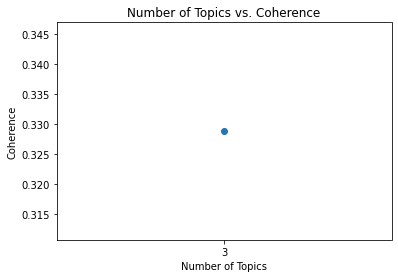

In [ ]:
plt.plot(x_eight,y_eight) #plot
plt.scatter(x_eight,y_eight) #makes dots
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_eight) #scale
plt.show() #displays and cnnects dots

#COHERENCE = 10

#LDA Model and topic distances

According to coherence analysis for 2018, the optimal number of topics was ten so this number was also used for 2021, for an equal comparison.

In [ ]:
ldamodel = LDA(doc_term_matrix_eight, num_topics=10, id2word = final_eight_dic, passes=40, iterations=200, chunksize = 10000)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [ ]:
vis = gensimvis.prepare(ldamodel, doc_term_matrix_eight,final_eight_dic)

In [ ]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.121961  0.010390       1        1  17.031191
2      0.033193 -0.079678       2        1  11.748834
4     -0.008920  0.040583       3        1  10.238330
9      0.016439 -0.013389       4        1  10.110536
8      0.007966 -0.052691       5        1  10.068574
3     -0.091864  0.135757       6        1   9.861666
5      0.056665  0.108064       7        1   9.588014
7     -0.094914 -0.017970       8        1   7.670172
1      0.081508 -0.044085       9        1   7.184347
6     -0.122034 -0.086983      10        1   6.498336, topic_info=           Term       Freq      Total Category  logprob  loglift
61          tax  40.000000  40.000000  Default   30.000  30.0000
8         india  26.000000  26.000000  Default   29.000  29.0000
235        fund  21.000000  21.000000  Default   28.000  28.0000
450     railway  11.000000  11.000000  Default   27.000  27.0000
125        cost  12.000000  12.000000  Default   26.000  26.0000
..          ...        ...        ...      ...      ...      ...
286  allocation   1.449484   8.205561  Topic10   -5.014   1.0000
309     mission   1.449481  10.630827  Topic10   -5.014   0.7411
133   household   1.449474   6.681517  Topic10   -5.014   1.2055
244        road   1.449473   8.129985  Topic10   -5.014   1.0093
516     payment   1.449470   7.429349  Topic10   -5.014   1.0994

[660 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
706       6  0.658337        aam
27        1  0.630209    ability
644       2  0.649833  abundance
334       3  0.165462     access
334       4  0.165462     access
...     ...       ...        ...
365      10  0.691830       wood
26        1  0.546667      world
26        4  0.182222      world
26        5  0.182222      world
26        9  0.182222      world

[1196 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 10, 9, 4, 6, 8, 2, 7])

In [ ]:
ldamodel = LDA(doc_term_matrix_one, num_topics=10, id2word = final_one_dic, passes=40, iterations=200, chunksize = 10000)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [ ]:
vis_one = gensimvis.prepare(ldamodel, doc_term_matrix_one,final_one_dic)

In [ ]:
vis_one

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.190524 -0.062810       1        1  13.492644
4      0.063297  0.106552       2        1  12.317664
6      0.108847 -0.097648       3        1  11.227546
5     -0.078982  0.133170       4        1  11.159870
7      0.016791 -0.064266       5        1  10.134042
9      0.010351  0.029994       6        1   9.766704
8      0.040180  0.015614       7        1   9.630201
0     -0.027278 -0.101535       8        1   8.722568
2      0.061688 -0.000214       9        1   7.676888
3     -0.004370  0.041144      10        1   5.871874, topic_info=               Term       Freq      Total Category  logprob  loglift
175           crore  48.000000  48.000000  Default  30.0000  30.0000
181  infrastructure  29.000000  29.000000  Default  29.0000  29.0000
19           health  13.000000  13.000000  Default  28.0000  28.0000
201        increase  20.000000  20.000000  Default  27.0000  27.0000
838             tax  21.000000  21.000000  Default  26.0000  26.0000
..              ...        ...        ...      ...      ...      ...
443           route   0.694779   4.356134  Topic10  -5.5544   0.9993
306          speech   0.694779   4.313737  Topic10  -5.5544   1.0090
445       passenger   0.694779   2.134426  Topic10  -5.5544   1.7126
734      university   0.694777   2.074250  Topic10  -5.5544   1.7412
91         faceless   0.694776   6.415637  Topic10  -5.5544   0.6121

[609 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
127       6  0.679008     abundant
85        9  0.705545   accelerate
149      10  0.735644    accession
160       7  0.688249  acknowledge
271       1  0.530386     activity
...     ...       ...          ...
122       9  0.138291        world
122      10  0.138291        world
530       5  0.684268         yard
188       2  0.661891        youth
188       5  0.220630        youth

[1031 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 7, 6, 8, 10, 9, 1, 3, 4])

The results show very different distributions in 2018 and 2021. 
Common topics: taxes, infrastructure, transportations,
Health was a dominant topic in 2021, but the subtopics mentioned werent focused on covid-19 preventative care, though there were also mentiones topics realted to the secondary impact of the pandemic, especially in housing and employment.

#Sources



1.   https://www.livemint.com/Politics/6ZTmv653VqU5ghPAcWCfTJ/Union-Budget-2018-Full-text-of-Arun-Jaitley-budget-speech.html
2.   https://www.kaggle.com/psrajput/budget-speech

